# **Customer Segmentation Using Machine Learning**


1.   Part 1 -  [Geolocation Distribution](https://colab.research.google.com/drive/1qJyfgHwf0usgogjwaPSdp0qTHHUYKtx2?authuser=3#scrollTo=Ok_FQFIAXjsP) 

2.   Part 2 -  [Time Period Exploration](https://colab.research.google.com/drive/1qJyfgHwf0usgogjwaPSdp0qTHHUYKtx2?authuser=3#scrollTo=Ok_FQFIAXjsP)  

3.   Part 3 -  [Customer Behaviour Exploration](https://colab.research.google.com/drive/1qJyfgHwf0usgogjwaPSdp0qTHHUYKtx2?authuser=3#scrollTo=0JEbGXUwDCWy) 

4.   Part 4 -  [Product Exploration](https://colab.research.google.com/drive/1qJyfgHwf0usgogjwaPSdp0qTHHUYKtx2?authuser=3#scrollTo=JRKuklikJ-ZP) 

5.   Part 5 -  [Product Recommendation System](https://colab.research.google.com/drive/1qJyfgHwf0usgogjwaPSdp0qTHHUYKtx2?authuser=3#scrollTo=P8dFr7AYf4qG) 





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install cleantext
! pip install geopy
! pip install folium
! pip install wordcloud
! pip install textblob
! pip install sklearn
! pip install plotly
! pip install googletrans
! pip install squarify
! pip install matplotlib
! pip install pandas
! pip install pywaffle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=16e7539058c6c0deeb3429dee8a1b5b5d8c601d1b7c82e7c5a66b917635abe75
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopy
import folium
from sklearn.preprocessing import StandardScaler
from geopy.geocoders import Nominatim, GoogleV3
from folium.plugins import MarkerCluster
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import nltk
from textblob import TextBlob
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from textblob import TextBlob
import re
import nltk
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from cleantext import clean as cleaner
from sklearn.decomposition import TruncatedSVD
import matplotlib
from googletrans import Translator


import matplotlib.pyplot as plt
import squarify
import matplotlib.pyplot as plt
import pywaffle
import numpy as np

In [ ]:
geo = pd.read_csv("/content/drive/MyDrive/Final Year Project Dataset Customer/geolocation_olist_public_dataset.csv")
order = pd.read_csv("/content/drive/MyDrive/Final Year Project Dataset Customer/olist_public_dataset_v2.csv")
cust = pd.read_csv("/content/drive/MyDrive/Final Year Project Dataset Customer/olist_public_dataset_v2_customers.csv")
pay = pd.read_csv("/content/drive/MyDrive/Final Year Project Dataset Customer/olist_public_dataset_v2_payments.csv")
trans = pd.read_csv("/content/drive/MyDrive/Final Year Project Dataset Customer/product_category_name_translation.csv")

# *Part 1 : Geolocation Distribution*


## 1) Market Distribution

In [ ]:
geo.head()

,zip_code_prefix,city,state,lat,lng
0,10,sao paulo,sp,-23.547807,-46.636122
1,10,sao paulo,sp,-23.546081,-46.644820
2,10,sao paulo,sp,-23.540984,-46.642569
3,10,sao paulo,sp,-23.546758,-46.645771
4,10,sao paulo,sp,-23.546362,-46.643073


In [ ]:
geo = geo.drop_duplicates(subset=None, keep='first', inplace=False)

In [ ]:
centroid = geo.groupby('zip_code_prefix').agg({
    'lat': 'median',
    'lng': 'median',
    'city': pd.Series.mode
}).reset_index()
centroid['count'] = geo.groupby('zip_code_prefix').size().reset_index(
    name='counts')['counts']

In [ ]:
import plotly
import plotly.express as px

token = 'pk.eyJ1IjoiZmFhdGhpcjk4IiwiYSI6ImNrMGVxMTl5dzBiZHYzYm1wMm15b2RhcXQifQ.InHG7-SGeNMtnnfkvIVCRg'
fig = px.scatter_mapbox(centroid,
                        lat="lat",
                        lon="lng",
                        size="count",
                        color="count",
                        size_max=8,
                        color_continuous_scale=px.colors.sequential.Redor,
                        zoom=2.7)
fig.update_layout(mapbox_style="outdoors", mapbox_accesstoken=token)
fig.show()

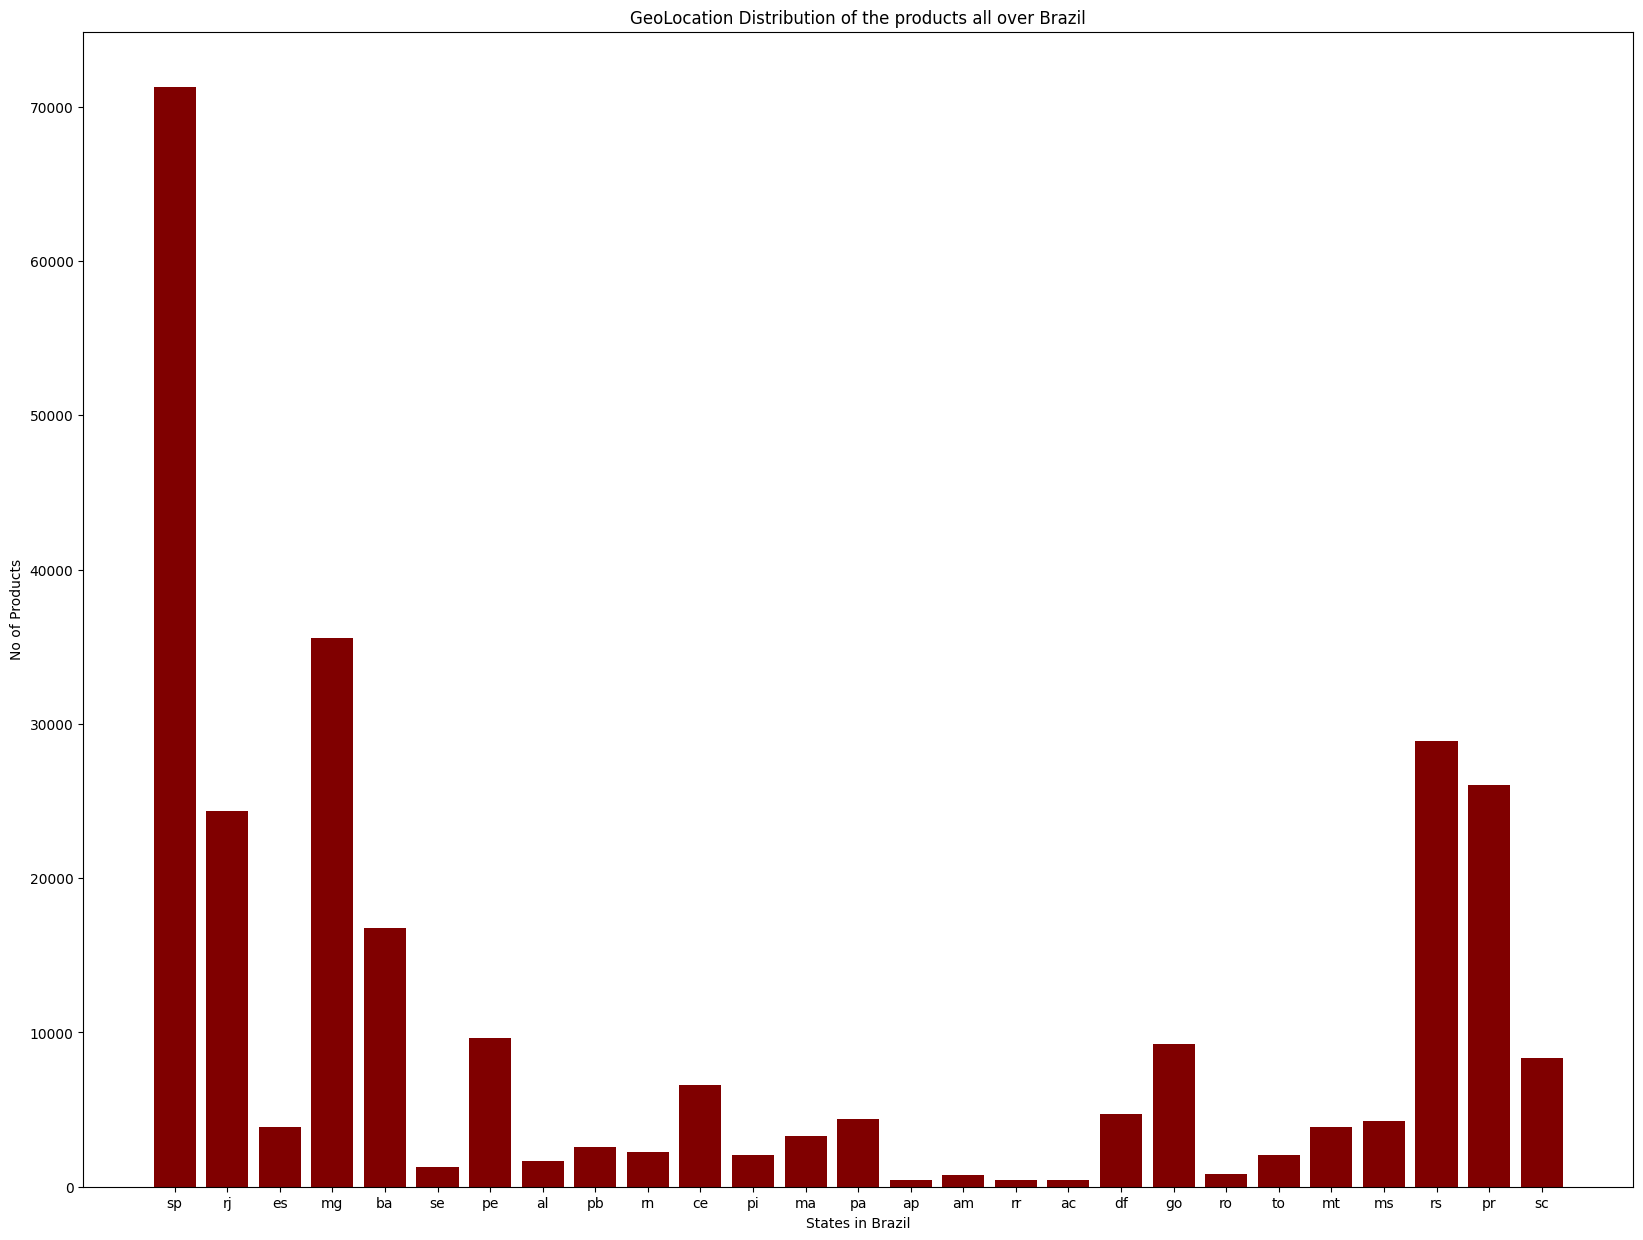

In [ ]:
dat = { 'sp': 71302,
'rj': 24331,
'es': 3851,
'mg': 35556,
'ba': 16761,
'se': 1272,
'pe': 9627,
'al': 1641,
'pb': 2601,
'rn': 2231,
'ce': 6577,
'pi': 2088,
'ma': 3265,
'pa': 4408,
'ap': 454,
'am': 728,
'rr': 447,
'ac': 421,
'df': 4745,
'go': 9226,
'ro': 839,
'to': 2061,
'mt': 3852,
'ms': 4291,
'rs': 28883,
'pr': 26031,
'sc': 8365    
}
states = list(dat.keys())
values = list(dat.values())


fig = plt.figure(figsize = (20 , 15))
 
# creating the bar plot
plt.bar(states, values, color ='maroon',
        width = 0.8)
 
plt.xlabel("States in Brazil")
plt.ylabel("No of Products")
plt.title("GeoLocation Distribution of the products all over Brazil")
plt.show()

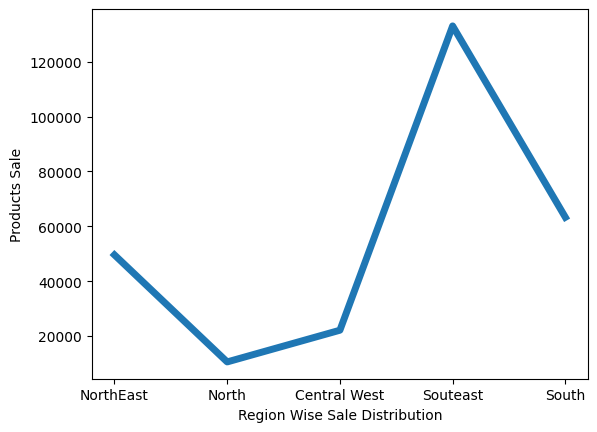

In [ ]:
regions_X = ['NorthEast','North','Central West','Souteast','South']
freq_Y = [49573, 10558, 22114, 133040, 63279]

plt.plot(regions_X,freq_Y,linewidth=5)
plt.xlabel("Region Wise Sale Distribution")
plt.ylabel("Products Sale")
plt.show()
  

## 2) Revernue Distribution

In [ ]:
order.head()

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01.000000,2017-02-01 02:41:21.549551,2017-03-15 00:00:00.000000,2017-02-06 11:04:24.154259,...,51,625,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00
1,59af46052a799e80e2f0c665c587731d,delivered,15.00,15.10,1,1,2017-09-09 19:52:54.000000,2017-09-10 20:03:31.535281,2017-10-02 00:00:00.000000,2017-09-13 20:17:41.296915,...,44,1428,2,ae5cad88462eb7b7b61401e31c45618e,59af46052a799e80e2f0c665c587731d,5,NaN,entrega em 2 dias produto c boa qualidade otim...,2017-09-14 00:00:00.000000,2017-09-15 03:43:47+00:00
2,a3e6136894621db402a772c6bc72a12a,delivered,238.90,18.00,1,1,2017-01-30 17:00:09.000000,2017-01-30 17:31:25.438253,2017-03-07 00:00:00.000000,2017-02-06 15:43:04.758566,...,55,637,1,0c9ff9d8ed9b9bdd825487b3a66e05f5,a3e6136894621db402a772c6bc72a12a,5,NaN,produto veio antes do prazo informado muito ob...,2017-02-07 00:00:00.000000,2017-02-10 14:18:53+00:00
3,b675ea5a618922f6e679e30531b8957b,delivered,29.99,18.23,1,1,2018-03-11 18:18:36.000000,2018-03-11 18:30:37.931962,2018-04-03 00:00:00.000000,2018-04-03 20:36:43.778451,...,55,617,1,ad0a798e7941f3a5a2fb8139cb62ad78,b675ea5a618922f6e679e30531b8957b,4,NaN,NaN,2018-04-04 00:00:00.000000,2018-04-05 02:52:31+00:00
4,195a8be6794c487fe6cfbb97b7c61902,delivered,295.99,47.65,1,1,2017-04-20 08:01:08.000000,2017-04-25 08:05:40.405383,2017-05-24 00:00:00.000000,2017-05-04 18:47:45.721758,...,49,558,2,eaf2046d4c87809247a30050ea13df03,195a8be6794c487fe6cfbb97b7c61902,5,NaN,NaN,2017-05-05 00:00:00.000000,2017-05-08 15:20:18+00:00


In [ ]:
order = order.drop_duplicates(subset=None, keep='first', inplace=False)

In [ ]:
geo_order = pd.merge(centroid,
                     order,
                     how='right',
                     left_on='zip_code_prefix',
                     right_on='customer_zip_code_prefix')

In [ ]:
geo_rev = geo_order.groupby('customer_zip_code_prefix').agg({
    'lat':
    'median',
    'lng':
    'median',
    'order_products_value':
    'sum'
}).reset_index()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(
    go.Densitymapbox(lat=geo_rev.lat,
                     lon=geo_rev.lng,
                     z=geo_rev.order_products_value,
                     radius=10))
fig.update_layout(mapbox_style="stamen-terrain",
                  mapbox_center_lon=-50,
                  mapbox_center_lat=-16,
                  mapbox_zoom=2.7)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

## 3) Customer Distribution


In [ ]:
geo_order = geo_order.dropna(subset=['zip_code_prefix'])
geo_cust = geo_order.groupby('customer_zip_code_prefix').agg({
    'lat':
    'median',
    'lng':
    'median',
    'customer_id':
    'count'
}).reset_index()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(
    go.Densitymapbox(lat=geo_cust.lat,
                     lon=geo_cust.lng,
                     z=geo_cust.customer_id,
                     radius=10))
fig.update_layout(mapbox_style="stamen-terrain",
                  mapbox_center_lon=-50,
                  mapbox_center_lat=-16,
                  mapbox_zoom=2.7)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

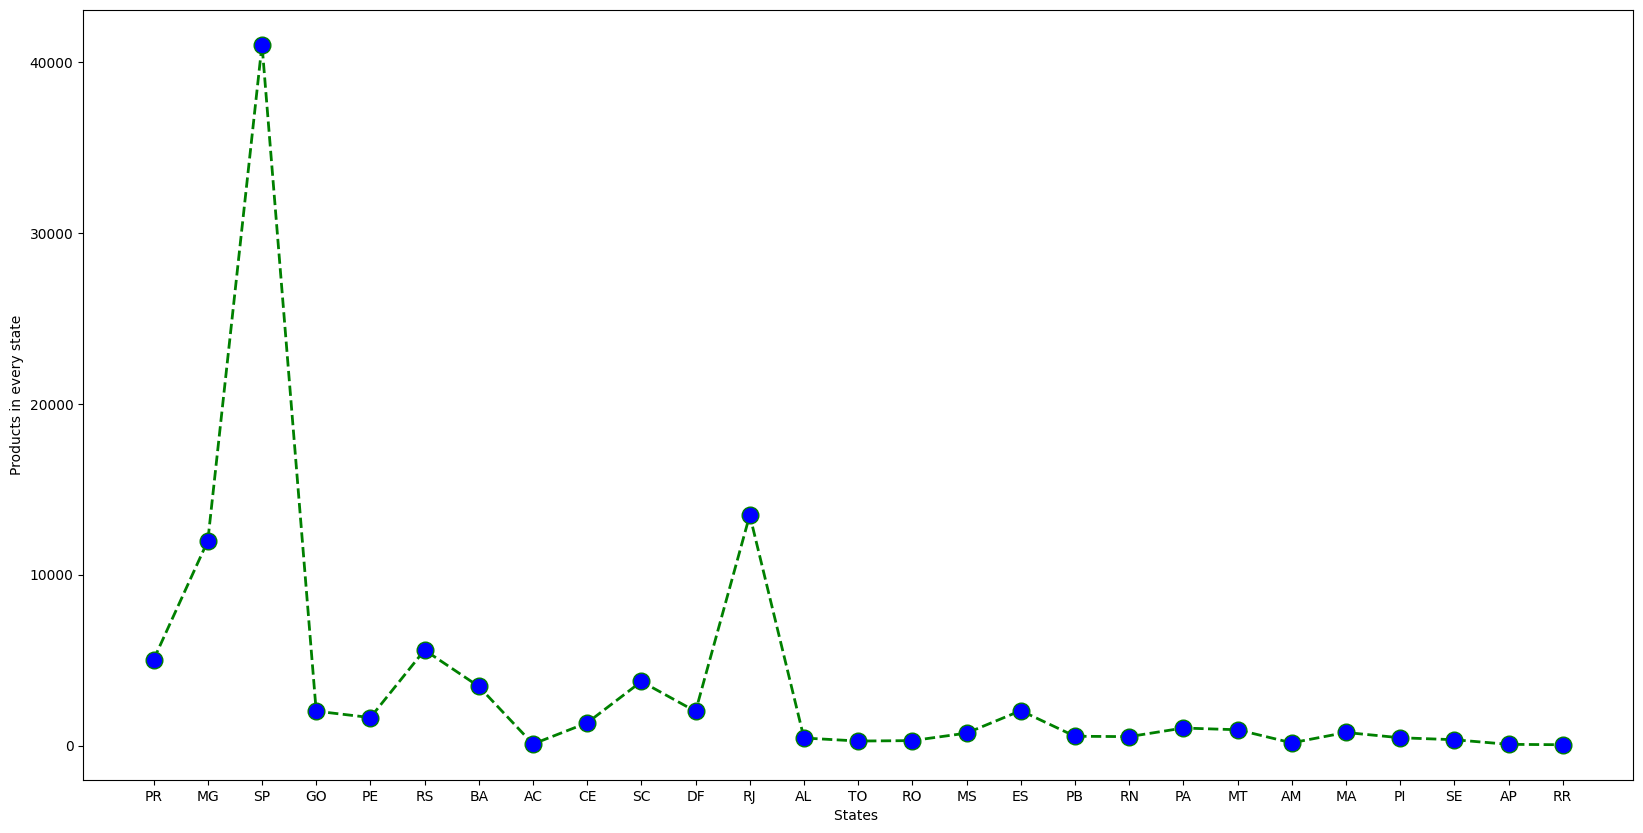

In [ ]:
unique_state = [] 
unique_state = geo_order['customer_state'].unique()

unique_statecount = []
for i in unique_state:
  frecount = geo_order['customer_state'].value_counts()[i]
  #print(i," -> ",frecount)
  unique_statecount.append(frecount)


plt.figure(figsize=(20, 10))
plt.plot(unique_state,unique_statecount,color='green', linestyle='dashed', linewidth = 2,
         marker='o', markerfacecolor='blue', markersize=12)

plt.xlabel("States ")
plt.ylabel("Products in every state")
plt.show()

In [ ]:
geo_order.product_category_name.unique()

array(['beleza_saude', 'informatica_acessorios', 'automotivo',
       'cama_mesa_banho', 'moveis_decoracao', 'esporte_lazer',
       'perfumaria', 'utilidades_domesticas', 'telefonia',
       'relogios_presentes', 'alimentos_bebidas', 'bebes', 'papelaria',
       'tablets_impressao_imagem', 'brinquedos', 'telefonia_fixa',
       'ferramentas_jardim', 'fashion_bolsas_e_acessorios',
       'eletroportateis', 'consoles_games', 'audio', 'fashion_calcados',
       'cool_stuff', 'malas_acessorios', 'climatizacao',
       'construcao_ferramentas_construcao',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'construcao_ferramentas_jardim', 'fashion_roupa_masculina',
       'pet_shop', 'moveis_escritorio', 'market_place', 'eletronicos',
       'eletrodomesticos', 'artigos_de_festas', 'casa_conforto',
       'construcao_ferramentas_ferramentas', 'agro_industria_e_comercio',
       'moveis_colchao_e_estofado', 'livros_tecnicos', 'casa_construcao',
       'instrumentos_musicais', 'm

In [ ]:
beauty4 = (
    geo_order['product_category_name'].value_counts()['beleza_saude'] + 
    geo_order['product_category_name'].value_counts()['perfumaria']
)
print(beauty4)

11752


In [ ]:
baby_and_kid5 = (
    geo_order['product_category_name'].value_counts()['bebes'] + 
    geo_order['product_category_name'].value_counts()['brinquedos']+ 
    geo_order['product_category_name'].value_counts()['fraldas_higiene'] + 
    geo_order['product_category_name'].value_counts()['fashion_roupa_infanto_juvenil']
)
print(baby_and_kid5)

6503


In [ ]:
food6 = ( 
    geo_order['product_category_name'].value_counts()['alimentos_bebidas'] + 
    geo_order['product_category_name'].value_counts()['alimentos'] + 
    geo_order['product_category_name'].value_counts()['bebidas']
)
print(food6)

590


In [ ]:
sports7 = geo_order['product_category_name'].value_counts()['esporte_lazer']
print(sports7)

7822


In [ ]:

homeimprovement8 =  (
    geo_order['product_category_name'].value_counts()['ferramentas_jardim'] +
    geo_order['product_category_name'].value_counts()['construcao_ferramentas_construcao'] +
    geo_order['product_category_name'].value_counts()['construcao_ferramentas_jardim'] +
    geo_order['product_category_name'].value_counts()['construcao_ferramentas_ferramentas'] +
    geo_order['product_category_name'].value_counts()['construcao_ferramentas_seguranca'] +
    geo_order['product_category_name'].value_counts()['construcao_ferramentas_iluminacao'] 
)
print(homeimprovement8)

5324


In [ ]:
books9 = (
    geo_order['product_category_name'].value_counts()['papelaria'] + 
    geo_order['product_category_name'].value_counts()['livros_tecnicos'] +
    geo_order['product_category_name'].value_counts()['livros_interesse_geral'] +
    geo_order['product_category_name'].value_counts()['livros_importados'] +
    geo_order['product_category_name'].value_counts()['cds_dvds_musicais'] +
    geo_order['product_category_name'].value_counts()['dvds_blu_ray'] +
    geo_order['product_category_name'].value_counts()['musica'] +
    geo_order['product_category_name'].value_counts()['artigos_de_festas'] 
)
print(books9)

2631


In [ ]:
furniture1 = (
    geo_order['product_category_name'].value_counts()['cama_mesa_banho'] +
    geo_order['product_category_name'].value_counts()['moveis_decoracao'] +
    geo_order['product_category_name'].value_counts()['moveis_cozinha_area_de_servico_jantar_e_jardim'] +
    geo_order['product_category_name'].value_counts()['moveis_escritorio'] +
    geo_order['product_category_name'].value_counts()['moveis_colchao_e_estofado'] +
    geo_order['product_category_name'].value_counts()['moveis_sala'] +
    geo_order['product_category_name'].value_counts()['moveis_quarto'] +
    geo_order['product_category_name'].value_counts()['casa_conforto'] +
    geo_order['product_category_name'].value_counts()['casa_conforto_2'] +
    geo_order['product_category_name'].value_counts()['portateis_casa_forno_e_cafe']
)
print(furniture1)

21162


In [ ]:
fashion2 = (
    geo_order['product_category_name'].value_counts()['fashion_bolsas_e_acessorios'] +
    geo_order['product_category_name'].value_counts()['fashion_calcados'] +
    geo_order['product_category_name'].value_counts()['fashion_roupa_masculina'] +
    geo_order['product_category_name'].value_counts()['fashion_roupa_feminina'] +
    geo_order['product_category_name'].value_counts()['fashion_underwear_e_moda_praia'] +
    geo_order['product_category_name'].value_counts()['fashion_esporte'] +
    geo_order['product_category_name'].value_counts()['fashion_roupa_infanto_juvenil']
)
print(fashion2)

3650


In [ ]:
electronics3 = (
    geo_order['product_category_name'].value_counts()['informatica_acessorios'] +
    geo_order['product_category_name'].value_counts()['tablets_impressao_imagem'] +
    geo_order['product_category_name'].value_counts()['telefonia'] +
    geo_order['product_category_name'].value_counts()['consoles_games'] +
    geo_order['product_category_name'].value_counts()['eletronicos'] +
    geo_order['product_category_name'].value_counts()['eletrodomesticos'] +
    geo_order['product_category_name'].value_counts()['pcs'] +
    geo_order['product_category_name'].value_counts()['eletrodomesticos_2'] +
    geo_order['product_category_name'].value_counts()['telefonia_fixa'] +
    geo_order['product_category_name'].value_counts()['portateis_casa_forno_e_cafe']
)
print(electronics3)

13857


In [ ]:
other10 = (
    geo_order['product_category_name'].value_counts()['cool_stuff'] +
    geo_order['product_category_name'].value_counts()['market_place'] +
    geo_order['product_category_name'].value_counts()['agro_industria_e_comercio'] +
    geo_order['product_category_name'].value_counts()['industria_comercio_e_negocios'] +
    geo_order['product_category_name'].value_counts()['artes'] +
    geo_order['product_category_name'].value_counts()['instrumentos_musicais'] +
    geo_order['product_category_name'].value_counts()['la_cuisine'] +
    geo_order['product_category_name'].value_counts()['sinalizacao_e_seguranca'] +
    geo_order['product_category_name'].value_counts()['artigos_de_natal'] +
    geo_order['product_category_name'].value_counts()['flores'] +
    geo_order['product_category_name'].value_counts()['seguros_e_servicos']
)
print(other10)

5892


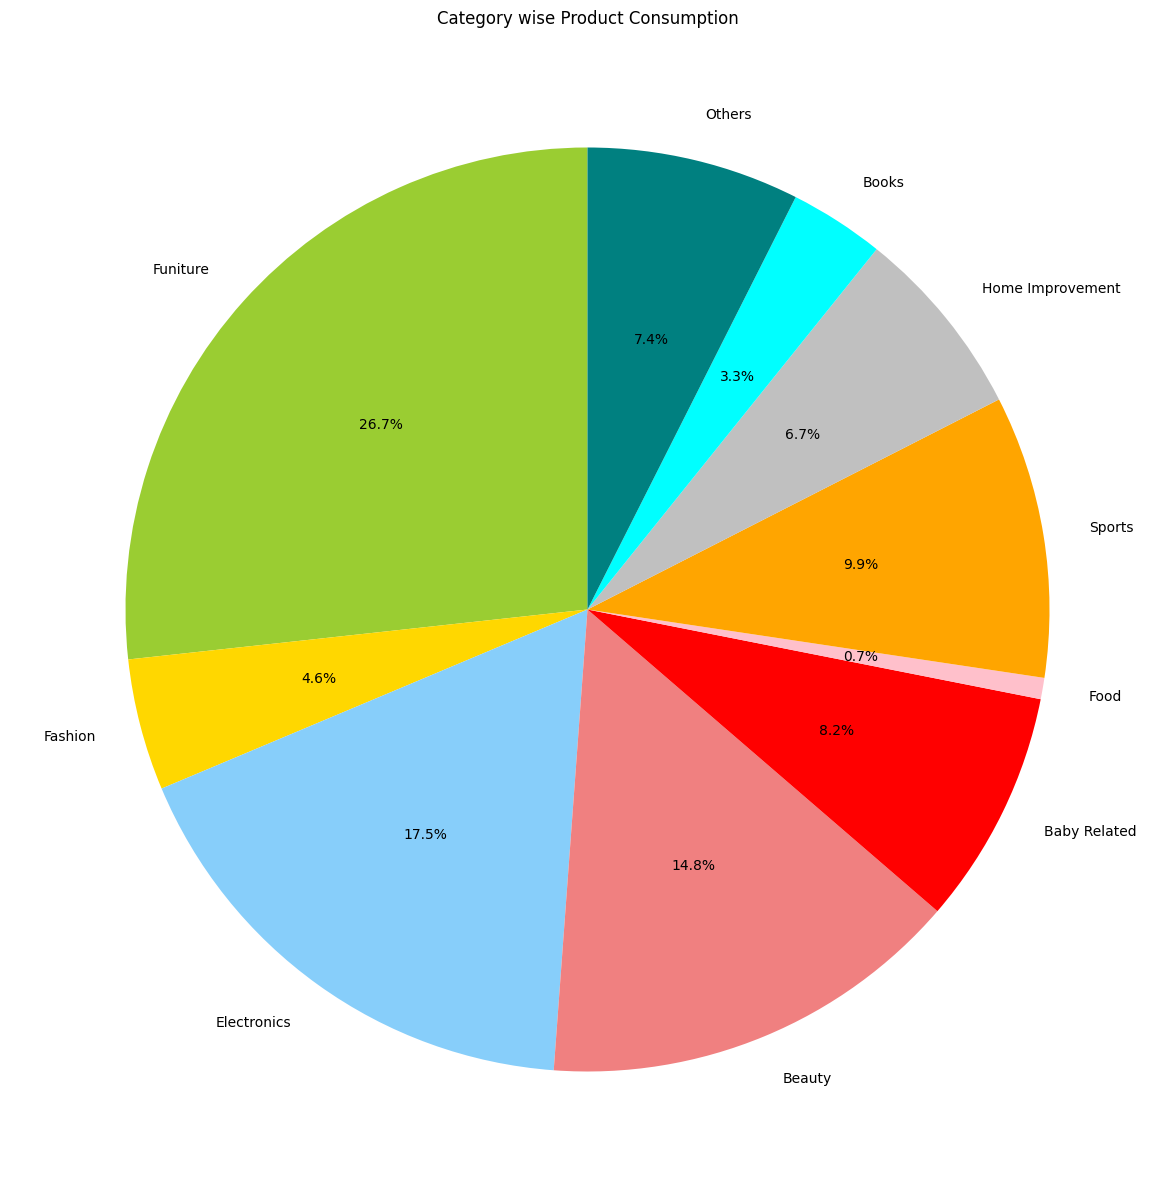

In [ ]:
import matplotlib.pyplot as plt

# Define data for the chart
labels = ['Funiture', 'Fashion', 'Electronics', 'Beauty','Baby Related','Food','Sports','Home Improvement','Books','Others']
sizes = [21162,3650,13857,11752,6503,590,7822,5324,2631,5892]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','red','pink','orange','silver','cyan','teal']


fig = plt.figure(figsize=(20, 15))
# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Category wise Product Consumption')

# Display the chart
plt.show()

# *Conclusion of Geolocation Distribution*

In this geological approach, there are a few things i would like to recommend:


1.   For **branding expansion**, it is best for the company to expand the market at **the west and north Brazil**. However, with low income from these location, it would be better to **build only a few market** for each city or area since the interest of the customer is currently low.
2.   For **increase in revenue**, it is best for the company to expand the market at these three hotspots:
  1.  **lat:-23, lng:-46**
  2.  **lat: -22, lng:-43**
  3.   **lat: -19, lng:-43**

Since these hotspots have highest number of customer and revenue, it shows that the customer around these hotspots interested with the market. 



# Part 2 : Time Period Exploration

## 1) *Accuracy of Delivery Estimation*


---


This section will analyze the accuracy that company estimate for delivery time. Moreover, I will divide the case when the delivery is late and early. We will start by cleaning the data by changing the variable type of delivery date and estimated date to datetime type.

In [ ]:
geo_order['order_delivered_customer_date'] = pd.to_datetime(
    geo_order['order_delivered_customer_date'])
geo_order['order_estimated_delivery_date'] = pd.to_datetime(
    geo_order['order_estimated_delivery_date'])

In [ ]:
geo_order = geo_order.dropna(subset=['order_delivered_customer_date'])

In [ ]:
geo_order['range_time'] = (
    geo_order['order_delivered_customer_date'] -
    geo_order['order_estimated_delivery_date']).astype('timedelta64[D]')

<ipython-input-37-51ab0b94e068>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
delay = geo_order['range_time'][geo_order['range_time'] > 0]
early = abs(geo_order['range_time'][geo_order['range_time'] < 0])

### *A. Early Delivery Exploration*


---

First, we divide the early dataset into five categories.

In [ ]:
bins = [0, 3, 7, 14, 30, 90]
labels = [
    '1-3 days', '4-7 days', '7-14 days', '14-30 days', 'More than 1 month' ]
early = pd.cut(early, bins=bins, labels=labels)


<Axes: xlabel='count', ylabel='range_time'>

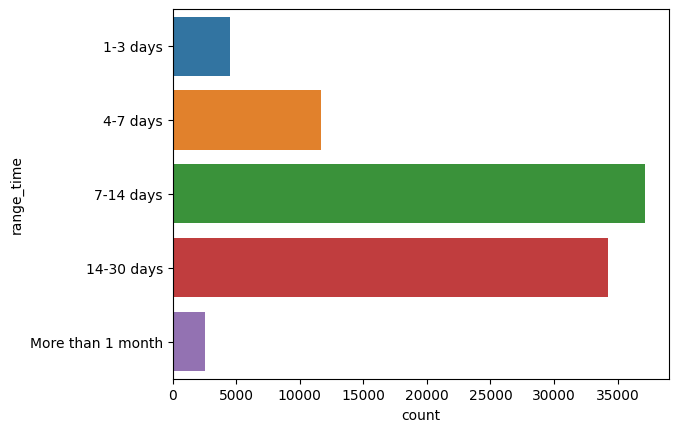

In [ ]:
sns.countplot(y=early)

It is shown above, that the early delivery mainly in 7-14 days and 14-30 days. However, even it is might be good for the customer to got an early delivery, it also shows the high inaccuracy of the delivery estimation. This issue also can impacting customer to consider cancel the order due to longer estimated delivery date.

### B) *Delay Delivery Estimation*

---

Same as the section above, we divide the delay dataset into six categories.

In [ ]:

bins = [0, 3, 7, 14, 30, 90, 300]
labels = [
    '1-3 days', '4-7 days', '7-14 days', '14-30 days', '1-3 month',
    'More than 3 months'
]
delay = pd.cut(delay, bins=bins, labels=labels)

<Axes: xlabel='count', ylabel='range_time'>

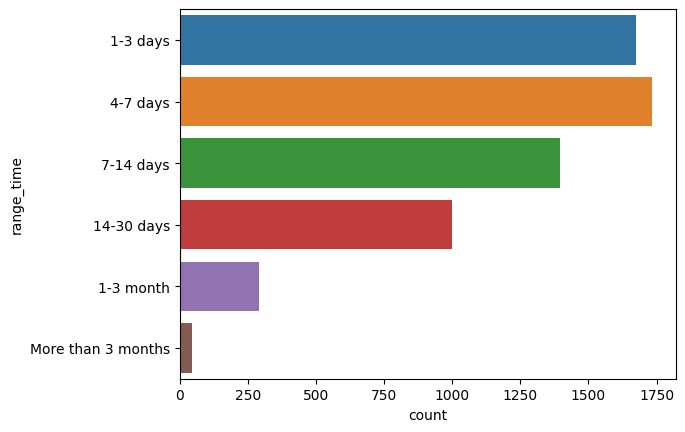

In [ ]:
sns.countplot(y=delay)

It is shown above, that the delivery delay mainly in 4-7 days and 1-3 days. This is could be company consideration to check the delivery estimator, since there is a lot day customer in 4-7 days. Moreover, there are some delayed delivery above 1 month, this would reduce customer satisfaction significanlly.



---


Next, we will see which location has high rates of delayed delivery. We will define delay default is 1 if it is delayed and 0 if it is not.

In [ ]:
geo_order['range_time_default'] = geo_order['range_time'].apply(
    lambda x: 1 if x > 0 else 0)

In [ ]:

delay_place = geo_order.groupby('zip_code_prefix').agg({
    'lat':
    'median',
    'lng':
    'median',
    'range_time_default':
    'mean'
})

In [ ]:

fig = go.Figure(
    go.Densitymapbox(lat=delay_place.lat,
                     lon=delay_place.lng,
                     z=delay_place.range_time_default,
                     radius=10))
fig.update_layout(mapbox_style="stamen-terrain",
                  mapbox_center_lon=-50,
                  mapbox_center_lat=-16,
                  mapbox_zoom=2.8)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

As shown above, there are five hotspots with high rates of delayed delivery, which located at:


1.   lat:-22, lng:-43
2.   lat:-23, lng:-46
3.   lat:-8, lng:-35
4.   lat:-29, lng:-52
5.   lat:-12, lng:-38

These hotspots must be the company concern.



## *Conclusion for the Accuracy*


---


Below, is percentage of early, normal, and delay delivery. 

In [ ]:
normal = geo_order['range_time'][geo_order['range_time'] == 0]
print('normal:',
      round(normal.count() * 100 / geo_order['range_time'].count(),
            3), '%', '\nearly:',
      round(early.count() * 100 / geo_order['range_time'].count(), 3), '%',
      '\ndelay:',
      round(delay.count() * 100 / geo_order['range_time'].count(), 3), '%')

normal: 1.259 % 
early: 92.44 % 
delay: 6.293 %


As we can see, the number of exact the percentage on early product is very high, approximately 92,5%. High number of early delivery might satisfy the customer, but **shows inaccuracy of delivery time estimator**. Moreover, even if the delay percentage is low, this should be the company concern since there are some order that have **delayed delivery more than one month**. As an analyst, I strongly suggest the company to **improve the delivery time estimator** since only 1% of customer predicted accurately. 

## 2) *Promotion Timing*


---

This section will analyze the best time to promote company's product or to release new product. First, we change the purchase time data type to datetime type.

In [ ]:
order['order_purchase_timestamp'] = pd.to_datetime(
    order['order_purchase_timestamp'])

### A. *Best Hour*


---


Next, we take only the hour part from the purchase time.

In [ ]:
best_time_hours = (order.order_purchase_timestamp).dt.hour

<ipython-input-49-d302ddd6c726>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='order_purchase_timestamp', ylabel='Density'>

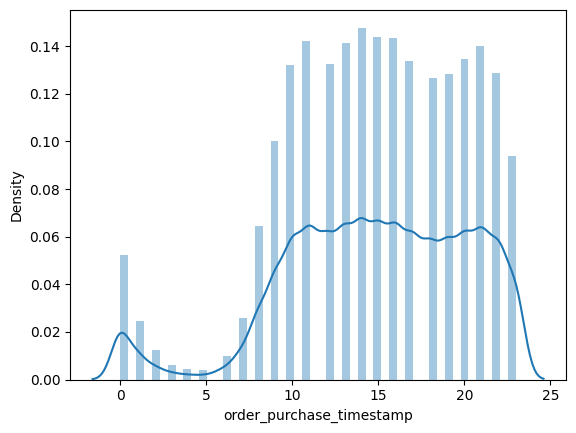

In [ ]:
sns.distplot(best_time_hours)

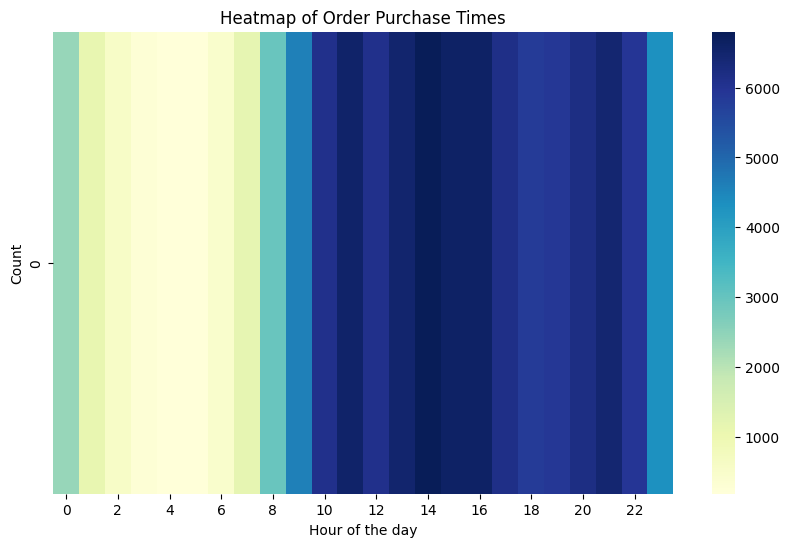

In [ ]:
import numpy as np
import seaborn as sns

hour_counts = order.order_purchase_timestamp.dt.hour.value_counts().sort_index()
heatmap_data = np.zeros((24,))
heatmap_data[hour_counts.index] = hour_counts.values.reshape(-1)

plt.figure(figsize=(10, 6)) 
sns.heatmap(heatmap_data.reshape(1, -1), cmap='YlGnBu', xticklabels=2)
plt.xlabel('Hour of the day')
plt.ylabel('Count')
plt.title('Heatmap of Order Purchase Times')
plt.show()

As shown above, most of the customers purchase products around 10 am until 22 pm.

### B. *Best Day*


---

At this part, we only take the day part from each purcahse date. 

<ipython-input-50-aae4c89590be>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='order_purchase_timestamp', ylabel='Density'>

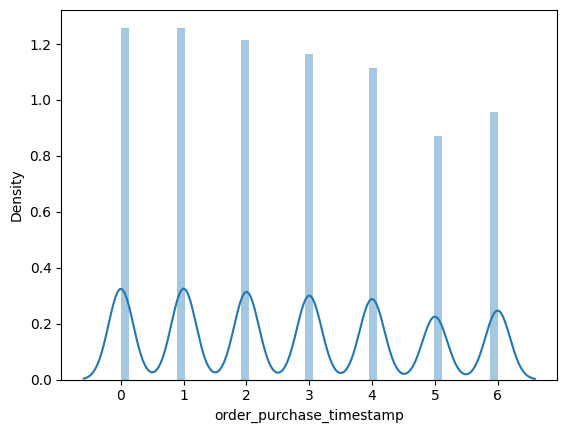

In [ ]:
best_time_day = order.order_purchase_timestamp.apply(lambda x: x.weekday())
sns.distplot(best_time_day)

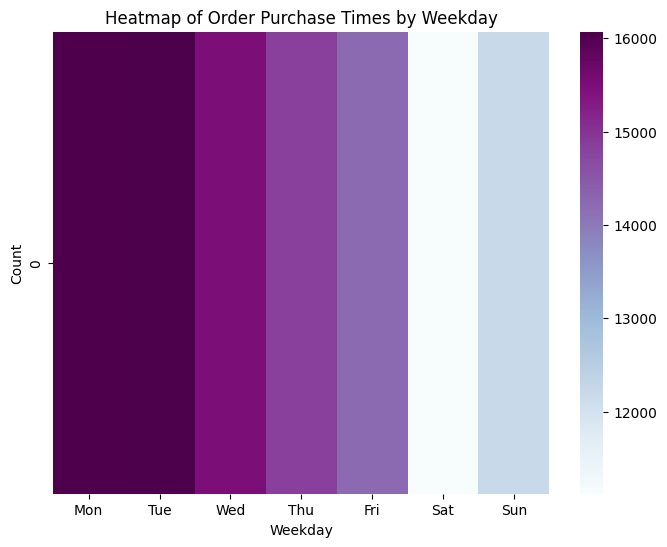

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

best_time_day = order.order_purchase_timestamp.apply(lambda x: x.weekday())

weekday_counts = best_time_day.value_counts().sort_index()
heatmap_data = np.zeros((7,))
heatmap_data[weekday_counts.index] = weekday_counts.values

plt.figure(figsize=(8, 6))  # Adjust the figure size as per your preference
sns.heatmap(heatmap_data.reshape(1, -1), cmap='BuPu', xticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.title('Heatmap of Order Purchase Times by Weekday')
plt.show()

As we can see, the highest number of purchase is on Tuesday(1), then Monday(0). However, even in other days the number of purchase not significanlly low, I recommend to avoid promote products in Saturday (5), since it is the lowest.

### 3) *Best Month*


---
First, we only take the month part from each purchase date.

<ipython-input-51-eb7f9c7eb544>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='order_purchase_timestamp', ylabel='Density'>

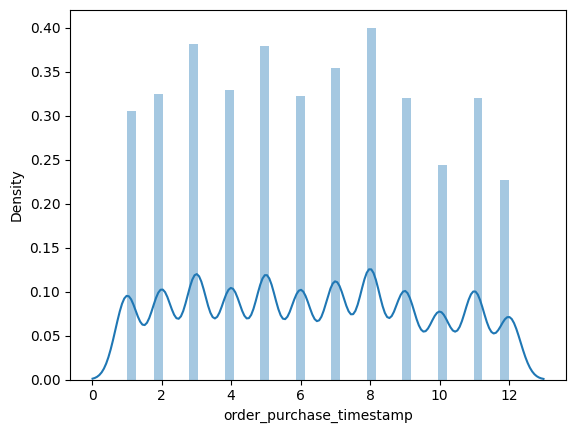

In [ ]:

best_time_month = (order.order_purchase_timestamp).dt.month
sns.distplot(best_time_month)


As shown above, the highest number of purchase in August (8). However, even in other days the number of purchase not significanlly low, I recommend to avoid promote products in December (12), since it is the lowest.

# *Conclusion of the Time Period Exploration*


---
Based on the previous analysis, We **recommend** the company to promote or release new products on:
- Hour: Around 10 am - 22 pm
- Day: Tuesday, Monday
- Month: August, February

It might be okay to promote on another time besides the time We mentioned above, since it is not significanlly different. However, there are some time with low number of purchase which the company should **avoid**:
- Hour: Around 3 am - 5 am
- Day: Saturday
- Month: December, October


# *Part 3 : Customer Behaviour Exploration*


---

This section will analyze the behaviour of customer and catagorize each customer to be paid attention furtherly. Let's look at the customer dataset.

In [ ]:
cust.head()

,customer_id,customer_unique_id
0,0000ca4ff2795842fd6b122c6d974468,ac0e5d7f07043dd32831bdad3b99ad26
1,00010f206878ba01f199aec4237de72e,4ed24aaed4079fe0661c0e4b3b420dff
2,00012a2ce6f8dcda20d059ce98491703,7e0e291c0f4fc2d69208954d26ed0586
3,000161a058600d5901f007fab4c27140,ff1dcb27ea444eddb94ea5fea77b875c
4,00017f1d6cce0d56046219a2cfabcbbb,237130c4b6717031ed62d9d0b16fd94f


In [ ]:
cust = cust.drop_duplicates(subset=None, keep='first', inplace=False)

In [ ]:
order_cust = pd.merge(cust,
                      order,
                      how='right',
                      left_on='customer_id',
                      right_on='customer_id')

In [ ]:

order_cust = order_cust.dropna(subset=['order_aproved_at'])
order_cust['order_aproved_at'] = pd.to_datetime(order_cust['order_aproved_at'])
order_cust['latest'] = max(order_cust.order_aproved_at)
order_cust[
    'range_time'] = order_cust['latest'] - order_cust['order_aproved_at']
recent = order_cust.groupby('customer_unique_id').agg({
    'range_time': 'min'
}).astype('timedelta64[D]')

<ipython-input-55-e6c941a834b0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
frequent = order_cust.groupby('customer_unique_id').agg(
    {'order_items_qty': 'sum'})

In [ ]:

monetary = order_cust.groupby('customer_unique_id').agg(
    {'order_products_value': 'sum'})

In [ ]:

tenure = order_cust.groupby('customer_unique_id').agg({
    'range_time': 'max'
}).astype('timedelta64[D]')

In [ ]:

rfmt = pd.concat([recent, frequent, monetary, tenure], axis=1)
rfmt.columns = ['recency', 'frequency', 'monetary', 'tenure']
# tenure defines the loyalty of the customer 

In [ ]:
rfmt.describe()

,recency,frequency,monetary,tenure
count,92499.000000,92499.000000,92499.000000,92499.00000
mean,307.114390,1.189094,139.651706,310.23637
std,157.680732,0.668378,212.647446,157.82497
min,0.000000,1.000000,2.000000,0.00000
25%,188.000000,1.000000,49.000000,191.00000
50%,305.000000,1.000000,89.900000,307.00000
75%,428.000000,1.000000,155.420000,432.00000
max,742.000000,25.000000,14776.000000,742.00000


Next, we want to rank each customer for each criteria. There will be rank 1 to 5, with rank 1 as the highest and rank 5 as the lowest.

In [ ]:
label1 = [5, 4, 3, 2, 1]
label2 = [1, 2, 3, 4, 5]
rfmt['R'] = pd.qcut(rfmt['recency'],
                    q=[0, 0.2, 0.4, 0.6, 0.8, 1],
                    labels=label1)
rfmt['F'] = pd.cut(rfmt['frequency'], bins=[0, 1, 2, 3, 5, 900], labels=label2)
rfmt['M'] = pd.qcut(rfmt['monetary'],
                    q=[0, 0.2, 0.4, 0.6, 0.8, 1],
                    labels=label2)
rfmt['T'] = pd.qcut(rfmt['tenure'],
                    q=[0, 0.2, 0.4, 0.6, 0.8, 1],
                    labels=label2)

In [ ]:
rfmt = rfmt.reset_index()
best = rfmt[rfmt.R.isin([4, 5]) & rfmt.F.isin([4, 5]) & rfmt.M.isin([4, 5])]
best['segment'] = 'BEST'

<ipython-input-62-6cba4bf902c0>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:


loyal_spender = rfmt[rfmt['R'].isin([4, 5]) & rfmt['F'].isin([2, 3])
                     & rfmt['M'].isin([2, 3]) & rfmt['T'].isin([3, 4, 5])]
loyal_spender['segment'] = 'LOYAL SPENDER'

<ipython-input-63-3848ca97717d>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
    potential_loyal = rfmt[rfmt['R'].isin([4, 5]) & rfmt['F'].isin([2, 3])
                        & rfmt['M'].isin([2, 3]) & rfmt['T'].isin([1, 2])]
    potential_loyal['segment'] = 'POTENTIAL LOYAL'
    ##############################################################################

    new_cust = rfmt[rfmt['R'].isin([4, 5]) & rfmt['F'].isin([1])
                    & rfmt['M'].isin([1]) & rfmt['T'].isin([1, 2])]
    new_cust['segment'] = 'NEW CUSTOMER'

    ##############################################################################
    loyal_cust = rfmt[rfmt['R'].isin([4, 5]) & rfmt['F'].isin([1])
                    & rfmt['M'].isin([1]) & rfmt['T'].isin([3, 5])]
    loyal_cust['segment'] = 'LOYAL CUSTOMER'

    #############################################################################
    promising = rfmt[rfmt['R'].isin([2, 3]) & rfmt['F'].isin([3, 5])
                    & rfmt['M'].isin([3, 5])]
    promising['segment'] = 'PROMISING'

    ##############################################################################
    cant_lose = rfmt[rfmt['R'].isin([1]) & rfmt['F'].isin([4, 5])
                    & rfmt['M'].isin([4, 5])]
    cant_lose['segment'] = 'CAN NOT LOSE'

    ########################################################################

    about_to_sleep = rfmt[rfmt['R'].isin([1]) & rfmt['F'].isin([4, 5])
                        & rfmt['M'].isin([4, 5])]
    about_to_sleep['segment'] = 'ABOUT TO SLEEP'

    #################################################################

    hibernating = rfmt[rfmt['R'].isin([1]) & rfmt['F'].isin([2, 3])
                    & rfmt['M'].isin([2, 3])]
    hibernating['segment'] = 'HIBERNATING'

    lost = rfmt[rfmt['R'].isin([1]) & rfmt['F'].isin([1]) & rfmt['M'].isin([1])
                & rfmt['T'].isin([1])]
    lost['segment'] = 'HIBERNATING'

#############################################################

<ipython-input-105-0c6fbc27edcd>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-105-0c6fbc27edcd>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-105-0c6fbc27edcd>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-105-0c

In [ ]:
rfmt_segment = pd.concat([
    best, loyal_spender, potential_loyal, new_cust, loyal_cust, promising,
    cant_lose, about_to_sleep, hibernating, lost
])

In [ ]:
rfmt_segment.sample(10)

,customer_unique_id,recency,frequency,monatary,tenure,R,F,M,T,segment
34018,5de5893c453a218883183f7285b3f6c5,241.0,1,19.70,241.0,4,1,1,2,NEW CUSTOMER
87201,f14c8cecca47445d8313c982f22c94a1,209.0,1,37.87,209.0,4,1,1,2,NEW CUSTOMER
74166,cd56260789fbd7458407f6e9e90f145a,211.0,1,39.99,211.0,4,1,1,2,NEW CUSTOMER
72183,c7d6d6b9f0647d103f0853fec1278f71,209.0,1,24.90,209.0,4,1,1,2,NEW CUSTOMER
82101,e30f65d361d76b8bc977b4d9571b8dbf,97.0,4,574.47,452.0,5,4,5,4,BEST
78844,da3d8e7bec86403f78f6c32fb43705f4,184.0,1,19.90,184.0,4,1,1,2,NEW CUSTOMER
79183,db287c6e0667806287b27e9ea85483a3,29.0,2,88.00,29.0,5,2,3,1,POTENTIAL LOYAL
77504,d68a378ada24ddbb779b7a8d316e8a8e,88.0,2,99.80,88.0,5,2,3,1,POTENTIAL LOYAL
74223,cd7de840a8ef961cd5df6fa749fbd28a,16.0,1,12.99,16.0,5,1,1,1,NEW CUSTOMER
59037,a344f5c7ccee7bcbd284c93cb27c2f8c,156.0,1,26.89,156.0,5,1,1,1,NEW CUSTOMER


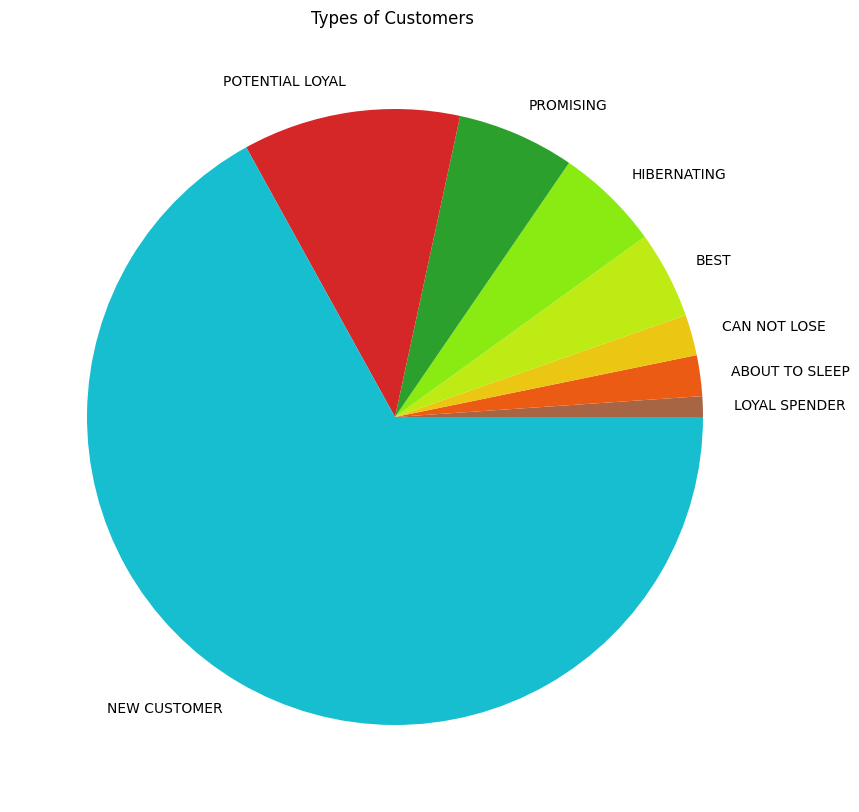

In [ ]:
count_newcustomer = rfmt_segment['segment'].value_counts()['NEW CUSTOMER'] # count of NEW CUSTOMER in the rfmt_segment
count_promising = rfmt_segment['segment'].value_counts()['PROMISING'] # count of PROMISING in the rfmt_segment
count_best = rfmt_segment['segment'].value_counts()['BEST'] # count of BEST in the rfmt_segment
count_loyalspender = rfmt_segment['segment'].value_counts()['LOYAL SPENDER'] # count of LOYAL SPENDER in the rfmt_segment
count_potentialloyal = rfmt_segment['segment'].value_counts()['POTENTIAL LOYAL'] # count of POTENTIAL LOYAL in the rfmt_segment
count_cannotlose= rfmt_segment['segment'].value_counts()['CAN NOT LOSE'] # count of CAN NOT LOSE in the rfmt_segment
count_abouttosleep = rfmt_segment['segment'].value_counts()['ABOUT TO SLEEP'] # count of ABOUT TO SLEEP in the rfmt_segment
count_hibernating = rfmt_segment['segment'].value_counts()['HIBERNATING'] # count of HIBERNATING in the rfmt_segment

'''
print(count_best,
        count_newcustomer, 
        count_promising, 
        count_loyalspender, 
        count_potentialloyal, 
        count_cannotlose, 
        count_abouttosleep,
        count_hibernating
       )
'''

x=[count_loyalspender,     
    count_cannotlose, 
    count_abouttosleep,
    count_best,   
    count_hibernating,  
    count_promising,
    count_potentialloyal,
    count_newcustomer]
fig = plt.figure(figsize =(10, 10))

plt.pie(x, labels=('LOYAL SPENDER','ABOUT TO SLEEP','CAN NOT LOSE','BEST','HIBERNATING','PROMISING','POTENTIAL LOYAL','NEW CUSTOMER'),
colors = ( "#a86544", "#eb5b13", "#ebc713", "#bdeb13", "#8aeb13", "#2ca02c", "#d62728","#17becf"))

plt.title('Types of Customers ')

plt.show()


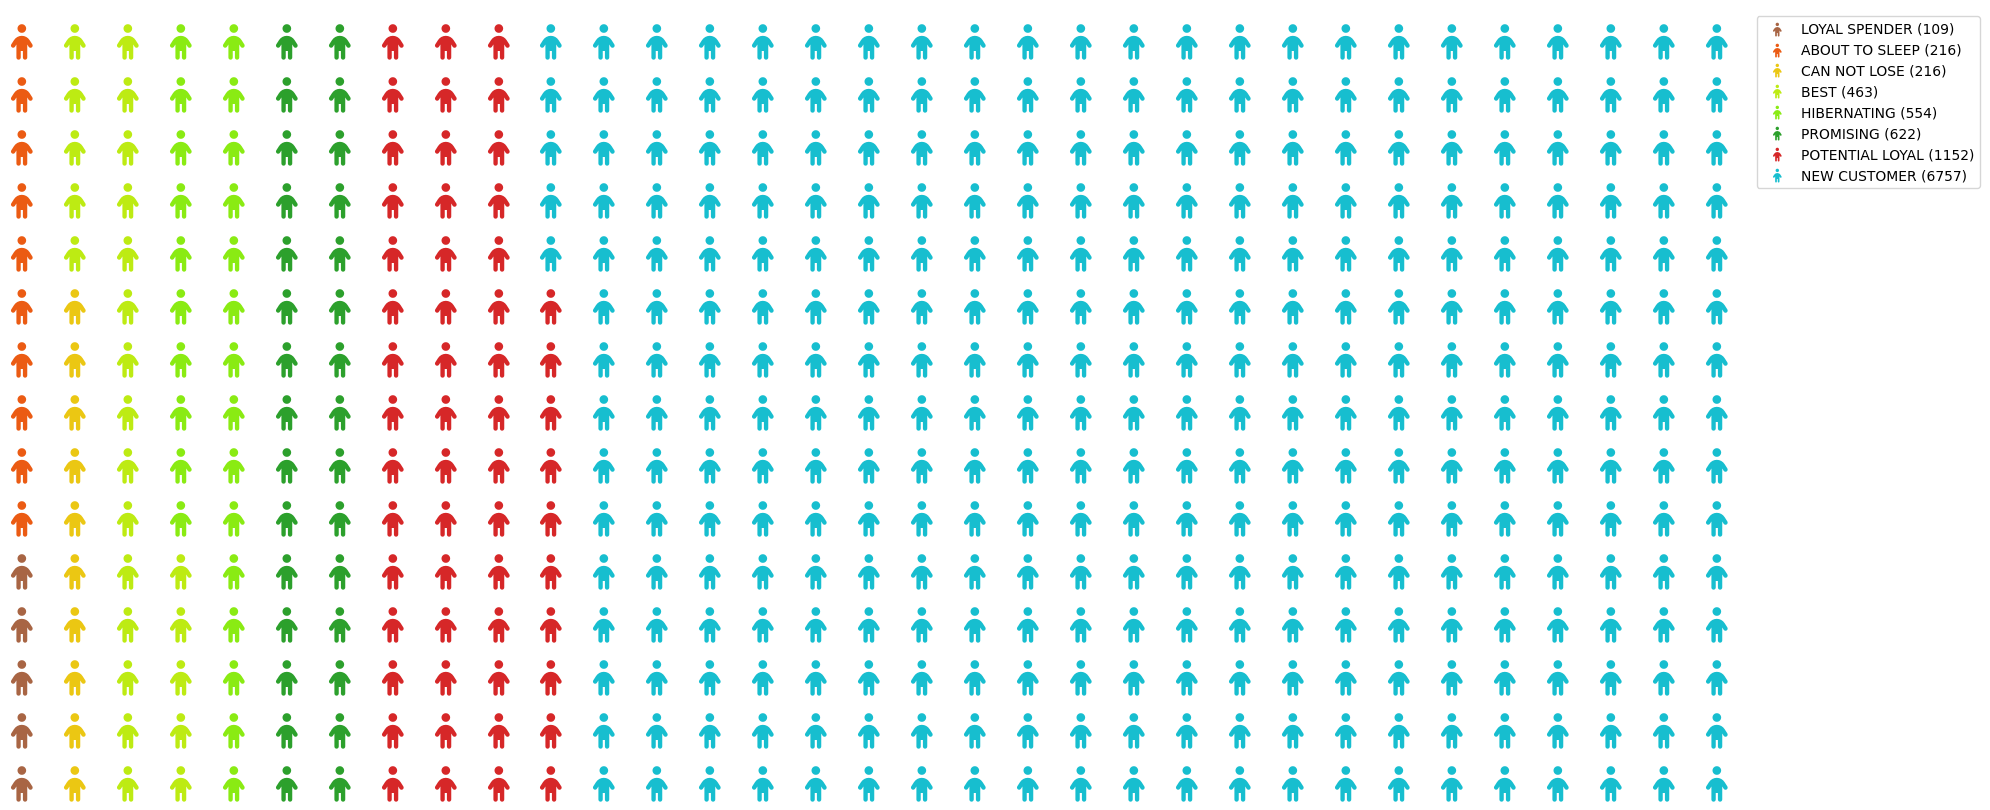

In [ ]:


# Define the data for the pie chart
labels = ['LOYAL SPENDER','ABOUT TO SLEEP','CAN NOT LOSE',
          'BEST','HIBERNATING','PROMISING','POTENTIAL LOYAL','NEW CUSTOMER']
values = [count_loyalspender,     
    count_cannotlose, 
    count_abouttosleep,
    count_best,   
    count_hibernating,  
    count_promising,
    count_potentialloyal,
    count_newcustomer]

# Calculate the proportions for the waffle chart
total = sum(values)
proportions = [round((value / total) * 100) for value in values]
waffle_values = [round((prop / 100) * 500) for prop in proportions]

# Create the pie chart
# fig, ax = plt.subplots()
# ax.pie(values, labels=labels, autopct='%1.1f%%')

from pywaffle import Waffle
# Create the waffle chart
fig = plt.figure(
    FigureClass=Waffle,
    figsize = (20,10),
    rows=15,
    values=waffle_values,
    colors=["#a86544", "#eb5b13", "#ebc713", "#bdeb13", "#8aeb13", "#2ca02c", "#d62728","#17becf"],
    icons = ['child','child','child','child','child','child','child','child'],
    icon_size=25, 
    icon_legend=True,
    labels=[f"{label} ({value})" for label, value in zip(labels, values)],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)

# Display the charts
plt.show()


**RFM Segment	        	Marketing Strategy**

> Loyal Spender         |   Personalized communication, offer loyalty program, no promotional offers needed

> Promising		        |   Make them feel valued and offer quality products, encourage to stick with brands

> Loyalist		        |   Offer loyalty program

> Potential Loyal	    |	Recommend products and offer discounts

> Hibernating		    |   Make great offers with big discounts

> About to Sleep		|   Try to win them with limited sales promotions

> Lost Customer	        |   Do not spent much effort and money to win them


### Types of Customers and their Description

###i. <em>Best Customer</em>

---
For this category, to keep this customer interest with your company, It is recommended to **give award for any purchased product**, such as **point** that may interest them to buy things at your company. This point can be exhange with **discount** or any other things that may interest them.  

### ii. <em>Loyal Spender</em>

---
Same as previous category, to keep the customer spending on your company, you can **give points for particular purchase**. With particular point accumulation, they can **ranked up** to 'best customer' category. 

### iii. <em>Potential Loyal</em>

---
Same as previous category, this kind of customer which new customer with frequent purchase. To keep the customer spending on your company, you can **give points** for every purchase. With particular point accumulation, they can **ranked up to 'loyal spender'** category, before they grow interest to another company. 

### iv. <em>New Customer</em>

---
For new customer, we do not really understand their behaviour. Therefore, the company may **promote things** that interest this customer from their previous purchase. 

### v. <em>Loyal Customer</em>

---
This customer have been loyal to the company.However, this customer better to be appriciated, I suggest the company may **give** this customer **few incentive**.

### vi. <em>About To Sleep</em>

---
This customer have frequently purchased at this company. However, it is been a long time since this customer purchased at this company. I recommend the company to **promote the company or the product** to notify this customer to shop more at this company.

### vii. <em>Can Not Lose Them & Hibernating</em>

---
The customer not so different with the previous category. However, this customer may not visit the website or application of this company longer. Therefore, it might be better for the company to **promote** its company or product by **sending it to the email** of the customer.

### viii. <em>Lost</em>

---
For this kind of customer, the customer is too far to approach because of lack interest at this company. So, I suggest to **not promote** the company to this category of customer, since the **customer have already lost** and **cost of promotion** to get them back will be **high.**

---



# *Conclusion of the Customer Behaviour Exploration*

---
I recommend to take appropriate **marketing action** based on the **segment of customer** to keep them enganged and keep generating profit.

# *Part 4 : Product Exploration*


---
At this section, we will explore the product from the market.



## 1) *Popularity Analysis*
This section will focus on exploring the popularity of product. Before we analyze, let's take a look at product translation dataset.

In [ ]:
trans.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
order_trans = pd.merge(trans,
                       order,
                       how='right',
                       on=['product_category_name', 'product_category_name'])
order_en = order_trans.drop(['product_category_name'], axis=1)

In [ ]:
order_en.head()

,product_category_name_english,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,health_beauty,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01,2017-02-01 02:41:21.549551,2017-03-15 00:00:00.000000,...,51,625,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00
1,computers_accessories,59af46052a799e80e2f0c665c587731d,delivered,15.00,15.10,1,1,2017-09-09 19:52:54,2017-09-10 20:03:31.535281,2017-10-02 00:00:00.000000,...,44,1428,2,ae5cad88462eb7b7b61401e31c45618e,59af46052a799e80e2f0c665c587731d,5,NaN,entrega em 2 dias produto c boa qualidade otim...,2017-09-14 00:00:00.000000,2017-09-15 03:43:47+00:00
2,auto,a3e6136894621db402a772c6bc72a12a,delivered,238.90,18.00,1,1,2017-01-30 17:00:09,2017-01-30 17:31:25.438253,2017-03-07 00:00:00.000000,...,55,637,1,0c9ff9d8ed9b9bdd825487b3a66e05f5,a3e6136894621db402a772c6bc72a12a,5,NaN,produto veio antes do prazo informado muito ob...,2017-02-07 00:00:00.000000,2017-02-10 14:18:53+00:00
3,bed_bath_table,b675ea5a618922f6e679e30531b8957b,delivered,29.99,18.23,1,1,2018-03-11 18:18:36,2018-03-11 18:30:37.931962,2018-04-03 00:00:00.000000,...,55,617,1,ad0a798e7941f3a5a2fb8139cb62ad78,b675ea5a618922f6e679e30531b8957b,4,NaN,NaN,2018-04-04 00:00:00.000000,2018-04-05 02:52:31+00:00
4,furniture_decor,195a8be6794c487fe6cfbb97b7c61902,delivered,295.99,47.65,1,1,2017-04-20 08:01:08,2017-04-25 08:05:40.405383,2017-05-24 00:00:00.000000,...,49,558,2,eaf2046d4c87809247a30050ea13df03,195a8be6794c487fe6cfbb97b7c61902,5,NaN,NaN,2017-05-05 00:00:00.000000,2017-05-08 15:20:18+00:00


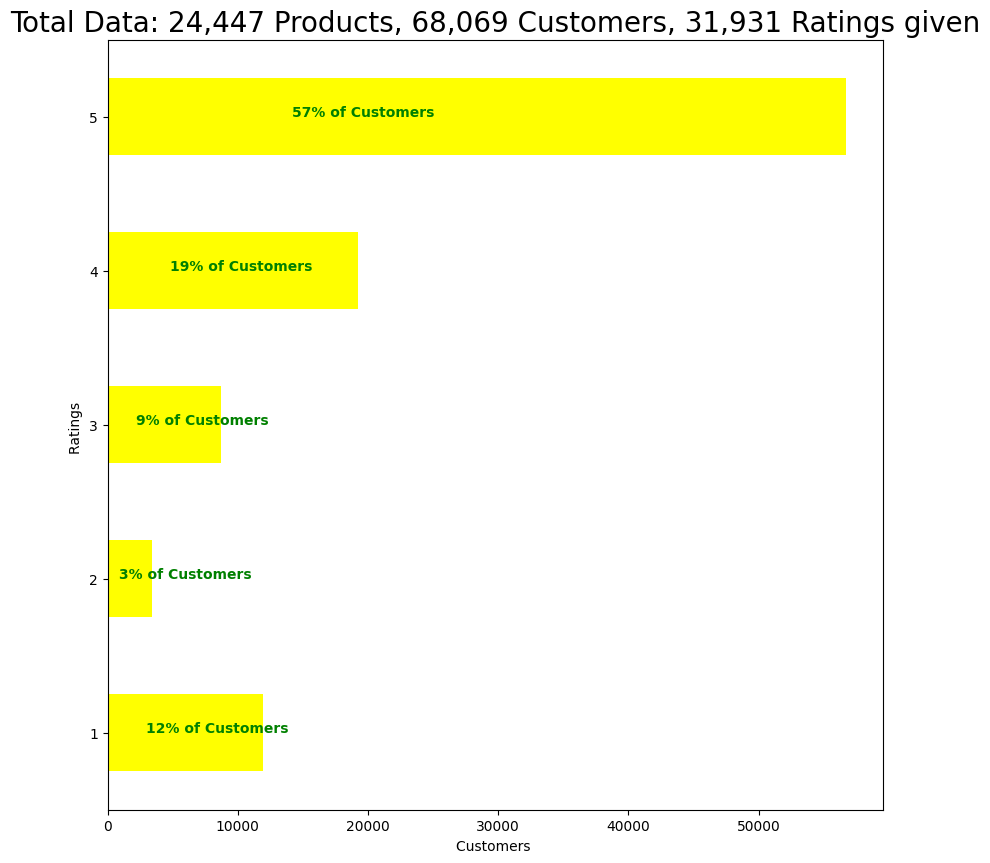

In [ ]:


n = order_en.groupby('review_score')['review_score'].agg(['count'])

prod_count = order_en['product_id'].nunique()

cust_count = cust['customer_unique_id'].nunique() - prod_count

rating_count = order_en['review_score'].count() - cust_count


ax = n.plot(kind='barh', legend=False, figsize=(10, 10), color = 'yellow')

plt.title(
    'Total Data: {:,} Products, {:,} Customers, {:,} Ratings given'.format(
        prod_count, cust_count, rating_count),
    fontsize=20)

plt.axis('on')
plt.ylabel("Ratings ")
plt.xlabel("Customers ")
for i in range(1, 6):
    ax.text(n.iloc[i - 1][0] / 4,
            i - 1,
            '{:.0f}% of Customers'.format( n.iloc[i - 1][0] * 100 / n.sum()[0]),
            color='green',
            weight='bold')

As we can see, it is actually excellent to have 57% of the products is rated 5. However, the rate 1: 12% percentage is quite high compared to rate 2 and 3.

>----------------------------------------------------------------------------------------------------------------------------

We'll take a look at the most popular product category, and we'll measure it by how many reviews has been submitted at each product category

In [ ]:
pop_prod = pd.DataFrame(
    order_en.groupby('product_id')['review_score'].count())
most_popular = pop_prod.sort_values('review_score', ascending=False)
most_popular.head(10)

,review_score
product_id,
99a4788cb24856965c36a24e339b6058,653
aca2eb7d00ea1a7b8ebd4e68314663af,615
422879e10f46682990de24d770e7f83d,475
d1c427060a0f73f6b889a5c7c61f2ac4,449
389d119b48cf3043d311335e499d9c6b,435
53759a2ecddad2bb87a079a1f1519f73,432
53b36df67ebb7c41585e8d54d6772e08,427
368c6c730842d78016ad823897a372db,380
2b4609f8948be18874494203496bc318,368


<Axes: ylabel='product_id'>

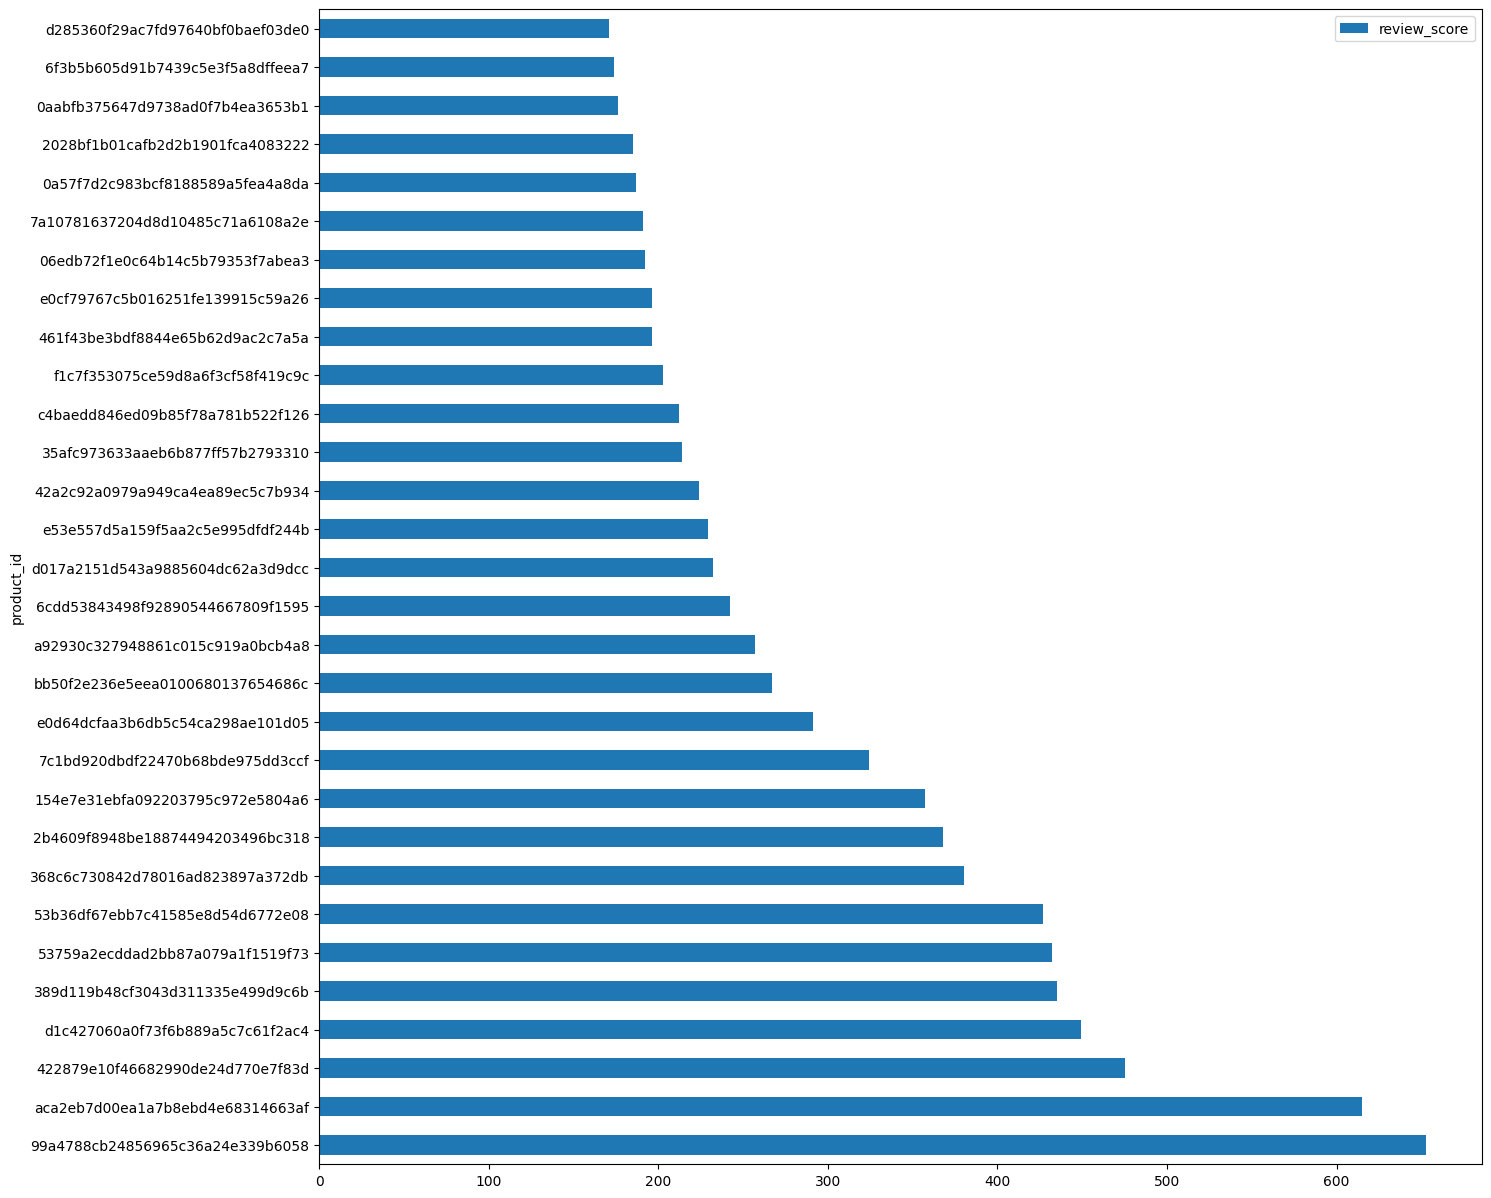

In [ ]:
plt.rcParams['figure.figsize'] = (15, 15)
most_popular.head(30).plot(kind="barh")

From the bar chart above, we can conclude that product with product id: '99a4788cb24856965c36a24e339b6058' is the most popular. This product has highest review score, this score may be different for each person (might be high or low). However, we only focus on how many people reviewing this product since the score indicate the popularity.


---
##*Conclusion*
We can conclude from this analysis that product id: **'99a4788cb24856965c36a24e339b6058'** is the most popular product. I recommend for the company to:
1. **Not promote** this **popular product frequently** since it is already popular
2. **Promote** another product with **low score of rating** to attract customer with the product.


---



## 2) *Popularity Analysis based on Review Scores*
This section will focus on exploring the rating and review scores in each state. It wil help us determine the states where the Reviews were poor and where there were good Review scores for the products by looking at the review count for each type ( for 5 - highest to 1 - lowest/poor ).

In [ ]:
import pandas as pd

# read the dataset into a pandas dataframe


# group the dataframe by the 'category_column'
grouped = order.groupby('customer_state')

# sum the occurrences of the value 'desired_value' in the 'value_column' for each category
review_5 = grouped['review_score'].apply(lambda x: (x == 5).sum())
review_4 = grouped['review_score'].apply(lambda x: (x == 4).sum())
review_3 = grouped['review_score'].apply(lambda x: (x == 3).sum())
review_2 = grouped['review_score'].apply(lambda x: (x == 2).sum())
review_1 = grouped['review_score'].apply(lambda x: (x == 1).sum())

review_scores_list = [review_5,review_4,review_3,review_2,review_1]
# print the occurrences for each category
print(review_scores_list)

#######################################################################################################


[customer_state
AC       48
AL      203
AM       83
AP       32
BA     1671
CE      675
DF     1158
ES     1111
GO     1071
MA      348
MG     6962
MS      406
MT      491
PA      525
PB      304
PE      864
PI      232
PR     3009
RJ     7188
RN      305
RO      162
RR       21
RS     3245
SC     2054
SE      168
SP    24214
TO      143
Name: review_score, dtype: int64, customer_state
AC      18
AL      90
AM      38
AP      20
BA     744
CE     265
DF     424
ES     416
GO     419
MA     170
MG    2316
MS     154
MT     195
PA     213
PB     101
PE     315
PI      91
PR    1005
RJ    2298
RN      97
RO      60
RR       9
RS    1097
SC     734
SE      67
SP    7825
TO      66
Name: review_score, dtype: int64, customer_state
AC       5
AL      38
AM      10
AP       9
BA     381
CE     126
DF     183
ES     185
GO     190
MA      71
MG    1053
MS      57
MT      79
PA      97
PB      47
PE     168
PI      39
PR     379
RJ    1167
RN      45
RO      26
RR       8
RS     475
SC     353
S

Enter a state abbreviation (e.g. SP, RJ, MG): SP


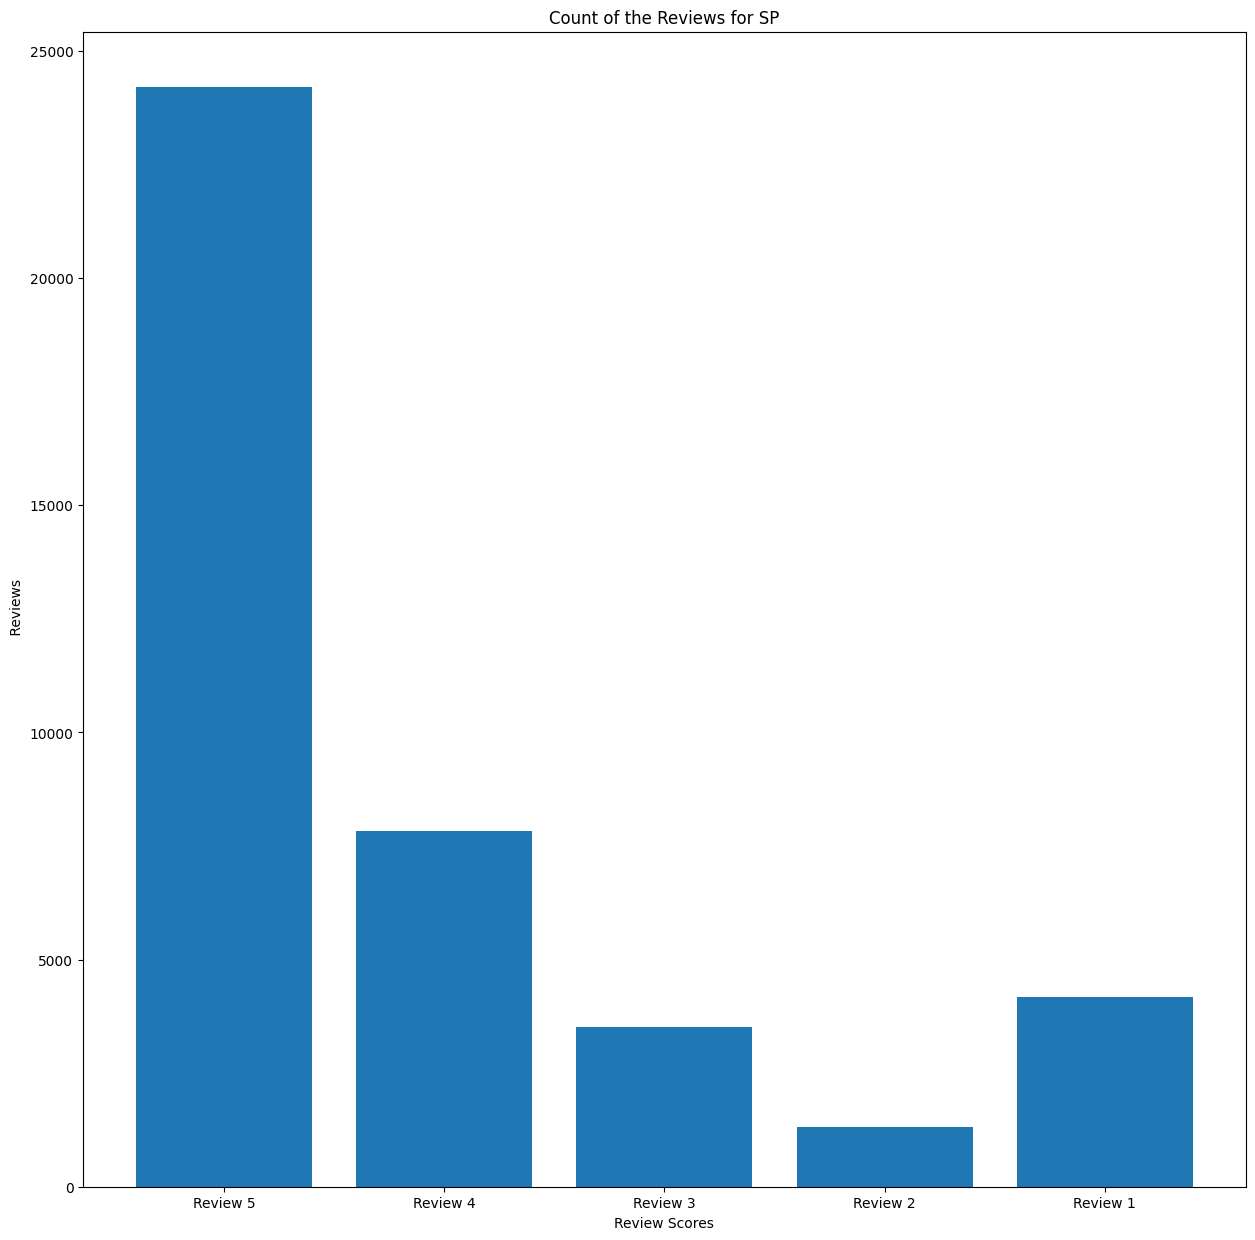

In [ ]:
import matplotlib.pyplot as plt

# Define the dictionary of state data
states_data = {
    "AC": [48, 18, 5, 4, 11],
    "AL": [203, 90, 38, 23, 86],
    "AM": [83, 38, 10, 12, 13],
    "AP": [32, 20, 9, 1, 6],
    "BA": [1671, 744, 381, 136, 527],
    "CE": [675, 265, 126, 60, 201],
    "DF": [1158, 424, 183, 69, 217],
    "ES": [1111, 416, 185, 73, 255],
    "GO": [1071, 419, 190, 78, 253],
    "MA": [348, 170, 71, 43, 131],
    "MG": [6962, 2316, 1053, 392, 1254],
    "MS": [406, 154, 57, 27, 81],
    "MT": [491, 195, 79, 36, 121],
    "PA": [525, 213, 97, 44, 144],
    "PB": [304, 101, 47, 24, 66],
    "PE": [864, 315, 168, 59, 232],
    "PI": [232, 91, 39, 19, 73],
    "PR": [3009, 1005, 379, 159, 475],
    "RJ": [7188, 2298, 1167, 576, 2317],
    "RN": [305, 37, 45, 12, 60],
    "RO": [162, 60, 26, 15, 24],
    "RR": [21, 9, 8, 0, 8],
    "RS": [3245, 1097, 475, 149, 620],
    "SC": [2054, 734, 353, 132, 474],
    "SE": [168, 67, 28, 14, 62],
    "SP": [24214, 7825, 3506, 1306, 4169],
    "TO": [143, 66, 18, 9, 25]
}

# Get user input for state abbreviation
state_abbr = input("Enter a state abbreviation (e.g. SP, RJ, MG): ").upper()

# Retrieve the data for the chosen state
state_data = states_data.get(state_abbr)

# If the state is not found in the dictionary, display an error message
if not state_data:
    print("Sorry, that is not a valid state abbreviation.")
else:
    # Define the labels for the bar graph
    labels = ['Review 5', 'Review 4', 'Review 3','Review 2','Review 1']
    
    
    # Create a bar graph of the state data
    plt.bar(labels, state_data)
    plt.xlabel("Review Scores")
    plt.ylabel(" Reviews")
    plt.title(f"Count of the Reviews for {state_abbr}")
    plt.show()


# Part 5 : Product Recommendation System

 At this section, we want to make a recommendation system for the product. If we input a product ID number, this system will recomend product for this customer. First, we gonna look at the order dataset.

In [ ]:
order.head()

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01,2017-02-01 02:41:21.549551,2017-03-15 00:00:00.000000,2017-02-06 11:04:24.154259,...,51,625,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00
1,59af46052a799e80e2f0c665c587731d,delivered,15.00,15.10,1,1,2017-09-09 19:52:54,2017-09-10 20:03:31.535281,2017-10-02 00:00:00.000000,2017-09-13 20:17:41.296915,...,44,1428,2,ae5cad88462eb7b7b61401e31c45618e,59af46052a799e80e2f0c665c587731d,5,NaN,entrega em 2 dias produto c boa qualidade otim...,2017-09-14 00:00:00.000000,2017-09-15 03:43:47+00:00
2,a3e6136894621db402a772c6bc72a12a,delivered,238.90,18.00,1,1,2017-01-30 17:00:09,2017-01-30 17:31:25.438253,2017-03-07 00:00:00.000000,2017-02-06 15:43:04.758566,...,55,637,1,0c9ff9d8ed9b9bdd825487b3a66e05f5,a3e6136894621db402a772c6bc72a12a,5,NaN,produto veio antes do prazo informado muito ob...,2017-02-07 00:00:00.000000,2017-02-10 14:18:53+00:00
3,b675ea5a618922f6e679e30531b8957b,delivered,29.99,18.23,1,1,2018-03-11 18:18:36,2018-03-11 18:30:37.931962,2018-04-03 00:00:00.000000,2018-04-03 20:36:43.778451,...,55,617,1,ad0a798e7941f3a5a2fb8139cb62ad78,b675ea5a618922f6e679e30531b8957b,4,NaN,NaN,2018-04-04 00:00:00.000000,2018-04-05 02:52:31+00:00
4,195a8be6794c487fe6cfbb97b7c61902,delivered,295.99,47.65,1,1,2017-04-20 08:01:08,2017-04-25 08:05:40.405383,2017-05-24 00:00:00.000000,2017-05-04 18:47:45.721758,...,49,558,2,eaf2046d4c87809247a30050ea13df03,195a8be6794c487fe6cfbb97b7c61902,5,NaN,NaN,2017-05-05 00:00:00.000000,2017-05-08 15:20:18+00:00


In [ ]:
order_rating = order.loc[:, ['customer_id', 'product_id', 'review_score']]

order_rating = order_rating[order_rating['product_id'].isin(
    order_rating['product_id'].value_counts()[
        order_rating['product_id'].value_counts() > 10].index)]



In [ ]:
order_rating = order_rating.reset_index()

In [ ]:
ratings_utility_matrix = order_rating.pivot_table(values='review_score',
                                                  index='customer_id',
                                                  columns='product_id',
                                                  fill_value=0)
ratings_utility_matrix.head()

product_id,001b72dfd63e9833e8c02742adf472e3,00250175f79f584c14ab5cecd80553cd,005030ef108f58b46b78116f754d8d38,008cff0e5792219fae03e570f980b330,00ba6d766f0b1d7b78a5ce3e1e033263,00baba5b58e274d0332a0c8a0a66f877,00de7f393d962717eeeb2d7131a40dba,00faa46f36261af8bbf3a4d37fa4841b,0110573bc9195aa810a4384f189f48f5,014a8a503291921f7b004a5215bb3c36,...,fe95eb948375116da759c8ef60295001,fe9dfbe7f974621789683b7b78be2a16,fecf6223a3494f35362f670e571d2a04,fed5c40c27e1c88560a9e92d82ee0825,feee7d52babf4002f100a79183eb7989,ff55834c0b3272853dfe62340f2bb91b,ff5f8606556b625613f069a5a9a48966,ff7fccf8513f360157f0660fe51d1d88,ffb97eb64c6fe1baada2410288c04457,ffc9caf33e2d1e9f44e3e06da19085f7
customer_id,,,,,,,,,,,,,,,,,,,,,
00012a2ce6f8dcda20d059ce98491703,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0001dad3e429b2831bf4e392170a8e8c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00031a627dcb899baea17e751172bef3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000379cdec625522490c315e70c7a9fb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00038477de4e0f0ac327ae1dc2f273c3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
ratings_utility_matrix.shape

(50012, 1651)

In [ ]:
X = ratings_utility_matrix.T
X.head()

customer_id,00012a2ce6f8dcda20d059ce98491703,0001dad3e429b2831bf4e392170a8e8c,00031a627dcb899baea17e751172bef3,000379cdec625522490c315e70c7a9fb,00038477de4e0f0ac327ae1dc2f273c3,0004164d20a9e969af783496f3408652,0004e8e0600daf29de26bd60b8feb007,000c88c401a87f064691b4bea3eb86b4,000e943451fc2788ca6ac98a682f2f49,000eac74d62085b7026a068cfa46b3e3,...,fff5169e583fd07fac9fec88962f189d,fff55ba8dffa552b6fdfd86c2e806459,fff5ca85c16ebb7e531dbd4a08756567,fff7466a253c0e59499ea943462c10f9,fff9b667c8b07d8f3a9b45e60cb16e20,fffbc3192c60df9a7434b4cb1695fb18,fffecc9f79fd8c764f843e9951b11341,ffff42319e9b2d713724ae527742af25,ffffa3172527f765de70084a7e53aae8,ffffdd34d58526db84c9eeb26bb38e4f
product_id,,,,,,,,,,,,,,,,,,,,,
001b72dfd63e9833e8c02742adf472e3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00250175f79f584c14ab5cecd80553cd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
005030ef108f58b46b78116f754d8d38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
008cff0e5792219fae03e570f980b330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00ba6d766f0b1d7b78a5ce3e1e033263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X.shape

(1651, 50012)

In [ ]:
def fitsystemrecommendation(ratings_utility_matrix):
    X = ratings_utility_matrix.T
    SVD = TruncatedSVD(n_components=10)
    decomposed_matrix = SVD.fit_transform(X)
    correlation_matrix = np.corrcoef(decomposed_matrix)
    return correlation_matrix

In [ ]:
correlation_matrix = fitsystemrecommendation(ratings_utility_matrix)

In [ ]:

def systemrecommendation(prod_id):
    order_rating.index[order_rating['product_id'] == prod_id].tolist()[1]
    product_names = list(X.index)
    product_ID = product_names.index(prod_id)
    correlation_product_ID = correlation_matrix[product_ID]
    Recommend = list(X.index[correlation_product_ID > 0.70])
    Recommend.remove(prod_id)
    return pd.DataFrame(Recommend[0:9], columns=['Recommendation'])

In [ ]:
product_recommend_id  = input("Enter the product_id to see the recommended products of the same: ")

print("\n**This is the list of the recommended products based on the Product ID: ",product_recommend_id)
systemrecommendation(product_recommend_id)

Enter the product_id to see the recommended products of the same: 00ba6d766f0b1d7b78a5ce3e1e033263

**This is the list of the recommended products based on the Product ID:  00ba6d766f0b1d7b78a5ce3e1e033263


,Recommendation
0,00faa46f36261af8bbf3a4d37fa4841b
1,02475368dfb38934fe55f574024fe1d7
2,0521fe3eb04940304b489d0fb49a37dd
3,0bb7cb61f1957f79dac582ab66ccdc1f
4,10717ff440b2320081989126e858b220
5,11875b30b49585209e608f40e8082e65
6,186fe07c8b8005ec6a498587ffbc1352
7,1a300f482e35d7eac74b229be067aefd
8,211293b50935ced8d4370f552c482d74


We can see the recommendation of other product ids, when we enter a specific product id . By using the function we have defined, this recommendation have high correlation with the product. Therefore, we suggest that the company should promote this recommendation product when the product inputted is purchased of viewed.

## Conclusion
This recommendation system can be used by the company to **promote the recommended product** after the user **purchase or interested** with the **currently viewed product**. By conduct this kind of promotion, your company does not randomly promote product. On the other hand, the product promoted has high correlation. Therefore, the customer **may purchased**  more since interest product appeared frequently.

To sum up, the analysis above can be the recommendation for the company to improve the market. We hope the recommendation can be useful for the company concerned. 

#Order Status Distribution

['delivered' 'canceled' 'shipped' 'invoiced' 'processing' 'unavailable'
 'approved']
[97590  1190   486   392   331     9     2]


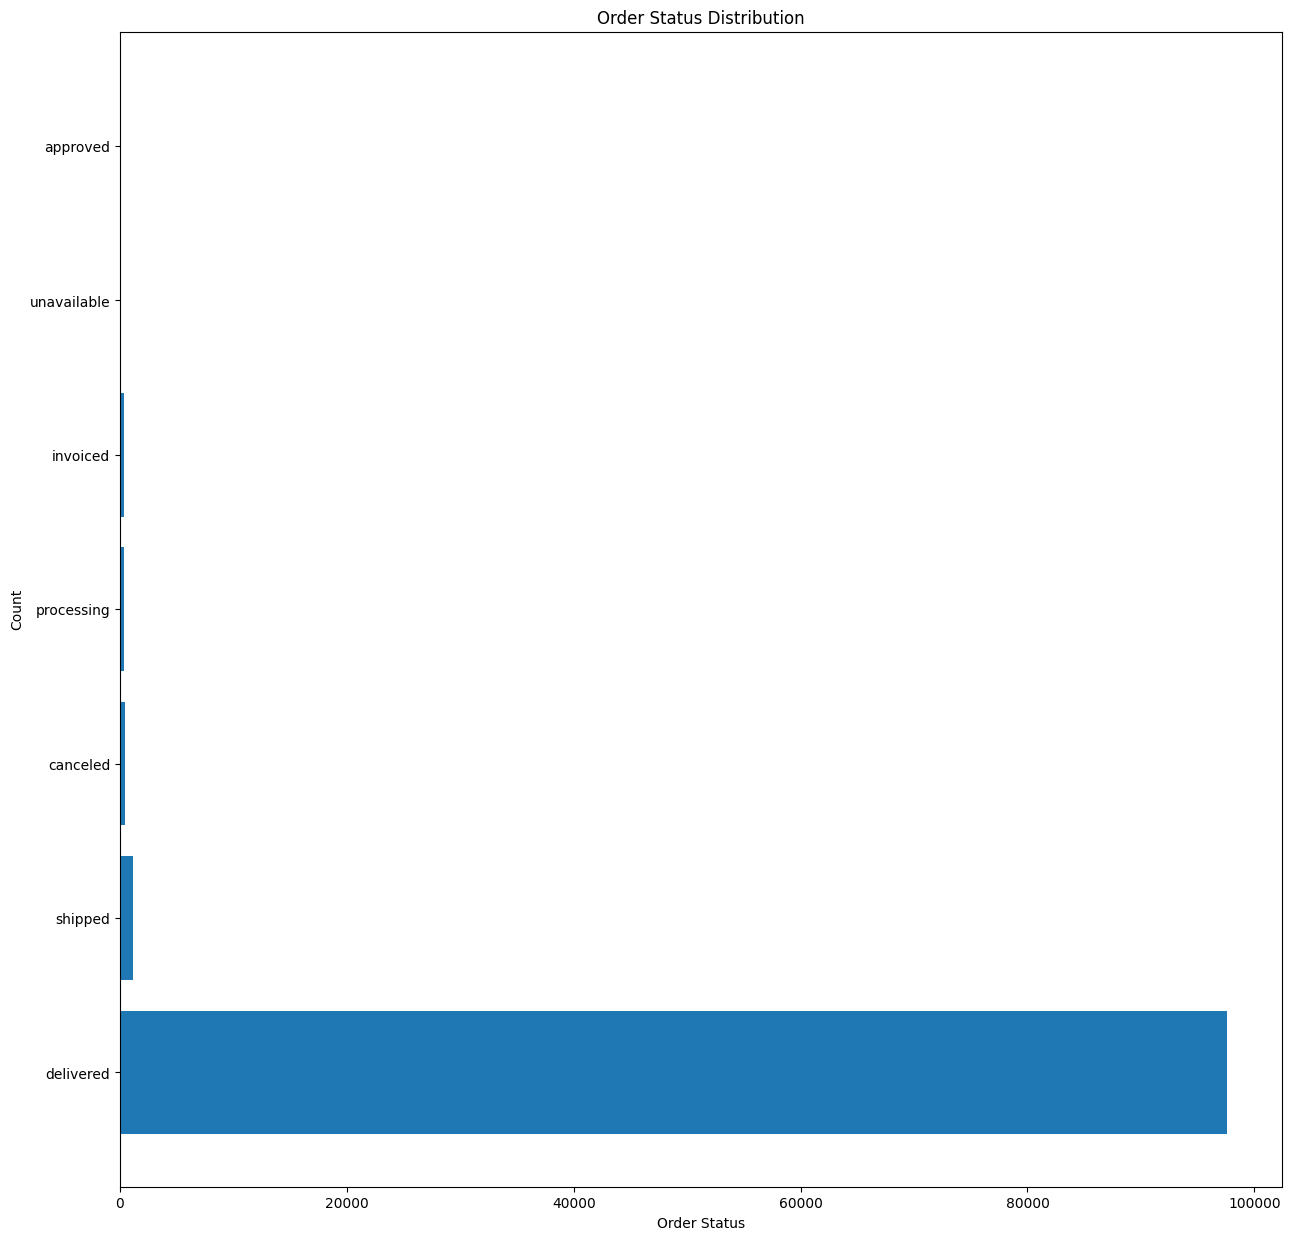

In [ ]:
import pandas as pd

# load your dataset into a Pandas dataframe


# select the column with the categories
category_column = order['order_status']
category_column_value = order['order_status'].value_counts()

# find the unique categories in the column
unique_categories = category_column.unique()
unique_categories_values = category_column_value.unique()

# print the unique categories
print(unique_categories)
print(unique_categories_values)

plt.barh(category_column_value.index, category_column_value.values)

# Add labels and title
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.title('Order Status Distribution')

# Show the plot
plt.show()

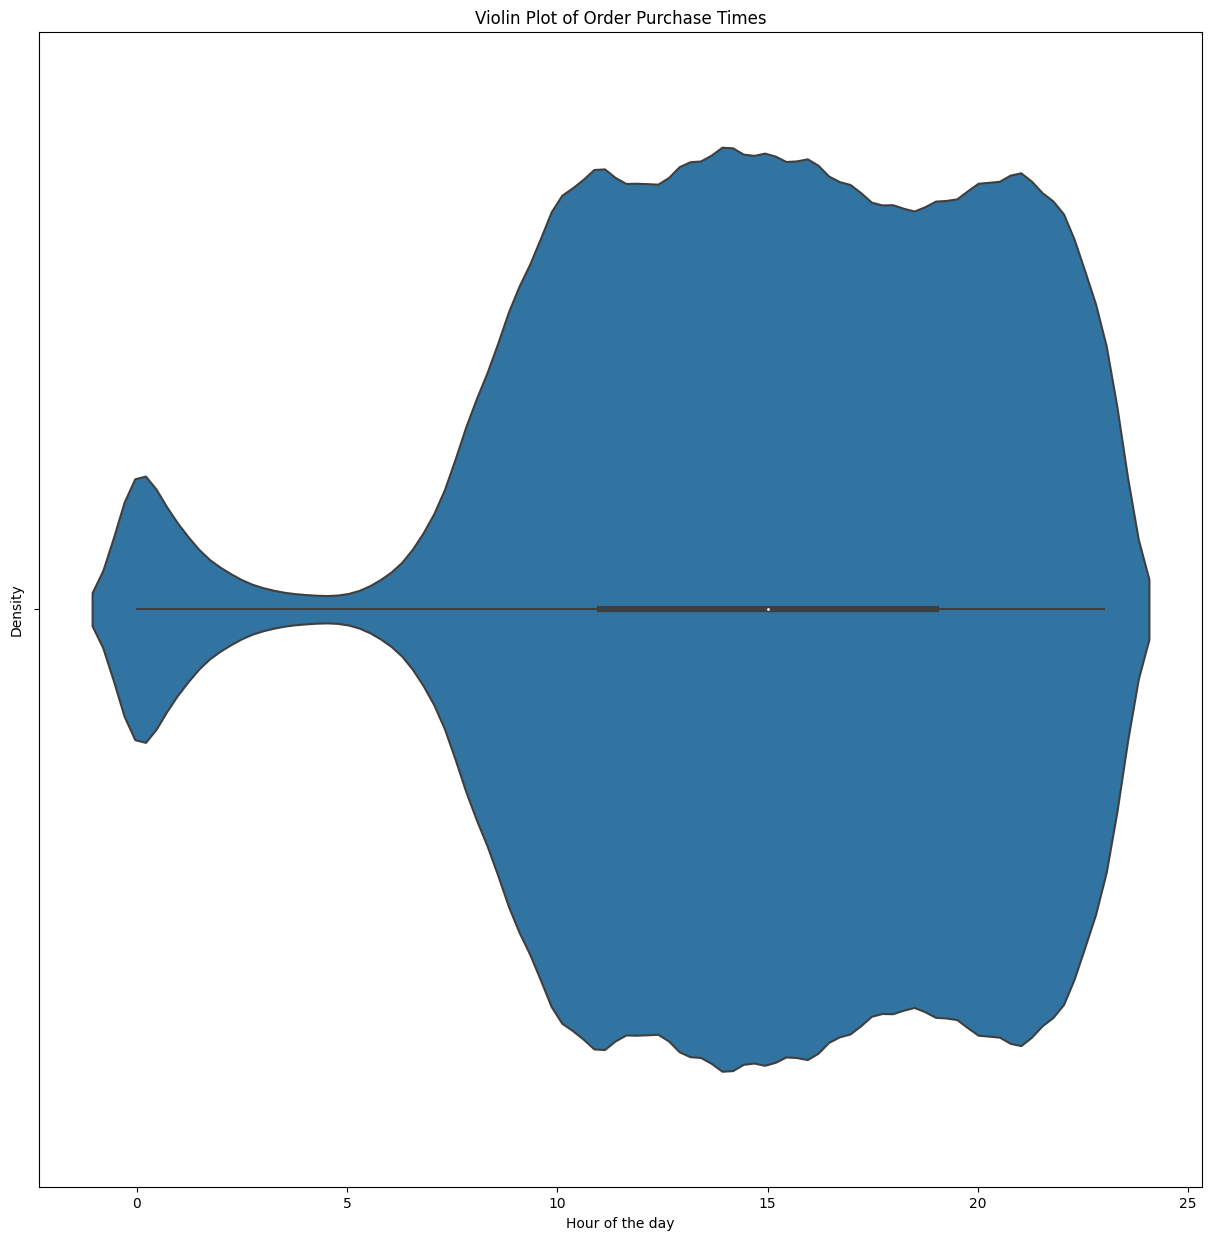

In [ ]:
best_time_hours = order.order_purchase_timestamp.dt.hour
sns.violinplot(x=best_time_hours)
plt.xlabel('Hour of the day')
plt.ylabel('Density')
plt.title('Violin Plot of Order Purchase Times')
plt.show()